In [ ]:
!pip install python-mnist #Used for handling IDX files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#import torch.optim as optim
#from torch.optim.lr_scheduler import _LRScheduler
#import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset

#import torchvision.transforms as transforms
#import torchvision.datasets as datasets
import tensorflow as tf


#from sklearn.model_selection import KFold
#from sklearn import decomposition
#from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from mnist import MNIST
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import os
import scipy

#import copy
import random
import time
import sys

In [ ]:
!pip install torchsummary #For displaying Models summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd


In [ ]:
!pip install torchmetrics
import torchmetrics #For calculating the confusion matrix parameters such as FP,TP,FN,TN 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 38.2 MB/s eta 0:00:00


In [ ]:
import gzip
import zipfile #For unzipping files

In [ ]:
import itertools #For models lists cross product when Pandas was not used

In [ ]:
import torchsummary
from datetime import datetime


In [ ]:
from google.colab import drive
from google.colab import files #For handling colab folders creation/deletion


In [ ]:
def unzipPath(path): #Unzip folders in a path, used in case the file to be processed is zipped
    for filename in os.listdir(path):
        if filename.endswith('.zip'):
            filename=f"{path}/{filename}"
            try :
                with zipfile.ZipFile(filename,"r") as zip_ref:
                    zip_ref.extractall(path)
                    zip_ref.close()
            except Exception as e:
                print (f"Exception {e} for filename {filename}")
                continue


In [ ]:
def zipPath(path): #zips all files in a folder, not used in this version but coded as a useful utility
    for filename in os.listdir(path):
        if not filename.endswith('.zip'):
            print (filename)
            filename=f"{path}\\{filename}"
            filename_zipped=f"{path}\\{filename}.zip"
            try :
                with zipfile.ZipFile(filename,"w") as zip_ref:
                    zip_ref.write(filename_zipped)
                zip_ref.close()
            except Exception as e:
                print (e)
                continue


In [ ]:
def gzipPath(path): #gzips all files in a folder, not used in this version but coded as a useful utility
    for filename in os.listdir(path):
        if not filename.endswith('.gz'):
            print (filename)
            filename=f"{path}\\{filename}"
            filename_gzipped=f"{path}\\{filename}.gz"
            try :
                with open(filename, 'rb') as orig_file:
                    with gzip.open(filename_gzipped, 'wb') as zipped_file:
                        zipped_file.writelines(orig_file)
                        filename.close()
                        filename_gzipped.close()
            except Exception as e:
                print (e)
                continue




In [ ]:
def gunzipPath(path): #ungzips all files in a folder, not used in this version but coded as a useful utility
    for filename in os.listdir(path):
        if filename.endswith('.gz'):
            filename_gzipped=f"{path}/{filename}"
            filename_unzipped=f"{path}/{filename}".replace('.gz','')
            try :
                fileObj=gzip.open(filename_gzipped,'rb')
                fileCont=fileObj.read()
                fileUnGzip=open(filename_unzipped,'wb')
                fileUnGzip.write(fileCont)
                fileUnGzip.close()
                fileObj.close()
            except Exception as e:
                print (e)
                continue





In [ ]:
def generateDatasetsColab(path = "drive/MyDrive/DL_Project"):

  #Given a colab path, then function will generate a list of all data representations ; VPN or not , L7 or all layers, ...etc and generate a catalog of categoreis (called experiments in the paper)

  print (f"Path:{path}")
  print (f"Folders in Path:")
  !ls {path} #Display files in the path

  feat_conn = ["Flow", "Session"]
  feat_proto = ["AllLayers", "L7"]
  feat_enc = ["Vpn", "Novpn"] #Labels for the 2-class
  feat_cont = ["Email", "Chat", "Streaming","File transfer", "VoIP", "P2P "] #Labels for the 6-class

  l1=[(class_,conn_,proto_) for class_ in [2,6,12] for conn_ in feat_conn for proto_ in feat_proto if class_!=6] 
  #List for all experiments except 6 class, i.e. list of all possible representations for 12 and 2-classess
  #Ex: [(2, 'Flow', 'AllLayers'), (2, 'Flow', 'L7'),

  l2=[(class_,conn_,proto_,enc_) for class_ in [2,6,12] for conn_ in feat_conn for proto_ in feat_proto for enc_ in feat_enc if class_==6]
  #List for all 6-class representations
  #Ex: [(6, 'Flow', 'AllLayers', 'Vpn'), (6, 'Flow', 'AllLayers', 'Novpn')
  # 6-class is special because 6-class has 2 experiments, one for identifying which application in case of VPN traffic, and anther in case of non-vpn traffic.

  l3=l1+l2 #L3 will include all categoreis


  All_Data = {} # open the data and store it in a dictionary


  #Extract the folders in each folder based on the category.
  #the dataset should in the form of 3 folder ; 12-class , 6-class, 2-class
  # under each folder there is a type of representation ; ex; 12-class/FlowL7/ , 12-class/FlowAllLayers
  # there will be 4 gzipped files under each folder; features file for training, labels for training, features file for testing, labels for testing
  # all in IDX byter format as MNIST Images.

  for i, folder in enumerate(l3):
      path1=(f'{path}/{folder[0]}class')

      unzipPath(path1)

      path2=(f'{path}/{folder[0]}class/{folder[1]}{folder[2]}') if folder[0]!=6 else (f'{path}/{folder[0]}class/{folder[3]}{folder[1]}{folder[2]}')
      gunzipPath(path2) #Unzip the gzipped files
      print(f'Files extracted and unzipped from path: {path2}')


      mndata = MNIST(path2) #Extract the MNIST data based on the standard naming convention  ; train-labels ... and idx-t10 prefix is used for testing data


      train_images, train_labels = mndata.load_training()
      test_images, test_labels = mndata.load_testing()
      All_Data[folder] = (train_images, train_labels, test_images, test_labels) # A json catalog for all data
  return All_Data

In [ ]:
def describeCategory(category=(2, 'Flow', 'AllLayers')):
#Given a category string ('classifier class = 12 or 6 or 2' , 'connection is flow or session' , 'protocol is L7 or AllLayers', 'only for 6-class the encryption string is added to be vpn or No vpn' )
  print(f"Category:{category}")
  print("Train size", len(All_Data[category][0]))
  print("Test size", len(All_Data[category][2]))
  print("Input size", len(All_Data[category][0][1]))

In [ ]:
def getLabel(category, i,j): #Get the label string value of the j-th sample from the training/test(corresponding to i=0 for Training or i=1 for Testing sample sets)
  k=1 if i==0 else 3
  return dict_labels[category[0] if category[0]!=6 else (category[0],category[3])][All_Data[category][k][j]]

In [ ]:
def describeSample(category=(2, 'Flow', 'AllLayers'), Sample_type='Tr', order=0): #Print an image of a sample in the dataset
  # Describe a sample given its category, either training or test datasets and the sample order 
  i=0 if Sample_type=='Tr' else 2 # Due to the ordering of the MNIST Files (Xtr, ytr, Xts, yts) the i-index of the features matrix is either 0 or 2
  j=order # j is the order of the sample
  image = np.asarray(All_Data[category][i][j])
  image = image.reshape((28,28))
  plt.imshow(image, cmap='gray')
  plt.show()
  print("Class :", getLabel(category, i, j))
  return

In [ ]:
def createDataset(category, All_Data, dataDim=1): # Takes MNIST files keyed by their category
# and provides a dataset objet in 2D or 1D based on the input argument dataDim 
  train_data1D = np.asarray(All_Data[category][0])
  test_data1D = np.asarray(All_Data[category][2])
  train_labels = np.asarray(All_Data[category][1])
  test_labels = np.asarray(All_Data[category][3])


  train_data = []
  test_data = []
  #print(test_data1D.shape)

  if dataDim==1:
    for i in range(len(train_data1D)):
      x_train = train_data1D[i].reshape((1, 784))
      train_data.append(x_train)

      if i < len(test_data1D):
        x_test = test_data1D[i].reshape((1, 784))
        test_data.append(x_test)

  elif dataDim==2:
    for i in range(len(train_data1D)):
      x_train = train_data1D[i].reshape((1, 28,28))
      train_data.append(x_train)

      if i < len(test_data1D):
        x_test = test_data1D[i].reshape((1, 28,28))
        test_data.append(x_test)

  train_data = np.asarray(train_data)
  test_data = np.asarray(test_data)

  print (f"Category {category}")
  print(f"train_data.shape {train_data.shape}, train_labels.shape {train_labels.shape}")
  print(f"test_data.shape {test_data.shape}, test_labels.shape {test_labels.shape}")
  train_data = CustomDataset(train_data, train_labels)
  test_data = CustomDataset(test_data, test_labels)

  return train_data,train_labels, test_data,test_labels


In [ ]:
def printSampleData(train_data,train_labels,i=0): #Print lengths of either the training or validation or testing dataset
  print(train_data[i], train_labels[i])
  return

In [ ]:
def splitValidation(train_data, VALID_RATIO=0.9): # Splits the training dataset into training and validation datasets to choose the best model based on the validation
  n_train_examples = int(len(train_data) *  VALID_RATIO)
  n_valid_examples = len(train_data) - n_train_examples

  train_data, valid_data = data.random_split(train_data, [n_train_examples, n_valid_examples])
  return train_data, valid_data

In [ ]:
def generateIterators(data,batch_size=50,Train=True): #Return a data iterator based on the batch size, shuffled or not depending on the type of the iterator
  shuffle_=True if Train==True else False
  return torch.utils.data.DataLoader(data,batch_size=batch_size ,shuffle=shuffle_)

In [ ]:
def batchSample(train_iterator, i=0): #Generate a sample batch to be used for printing model summary
  for x,y in train_iterator:
    break
  return x,y


In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device=device, dtype=torch.float)
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)


        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def plot_confusion_matrix(labels, pred_labels, classes, category,title): 
  #Plots confusion matrices of any model based on the predictions against the true labels
  # also display the category of the representation (how many classess, VPN or not , L7 or all Layers, Session or Flow)

    fig = plt.figure(figsize = (10, 10));
    ax = fig.add_subplot(1, 1, 1);
    cm = confusion_matrix(labels.cpu(), pred_labels.cpu());
    cm = ConfusionMatrixDisplay(cm, display_labels = classes);
    cm.plot(values_format = 'd', cmap = 'Blues', ax = ax)
    plt.title(f'Experiment: {category} - {title}')
    plt.xticks(rotation = 20)

In [ ]:
def initialize_parameters(net):
  #Initializes the model convolutional 1D and linear layers
  for m in net.modules():
    if isinstance(m, nn.Conv1d):
        nn.init.kaiming_normal_(m.weight.data, nonlinearity = 'relu')
        nn.init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data, gain = nn.init.calculate_gain('relu'))
        nn.init.constant_(m.bias.data, 0)

# Models Definition

The 2 Models used are ;


a) CNN-1D Model;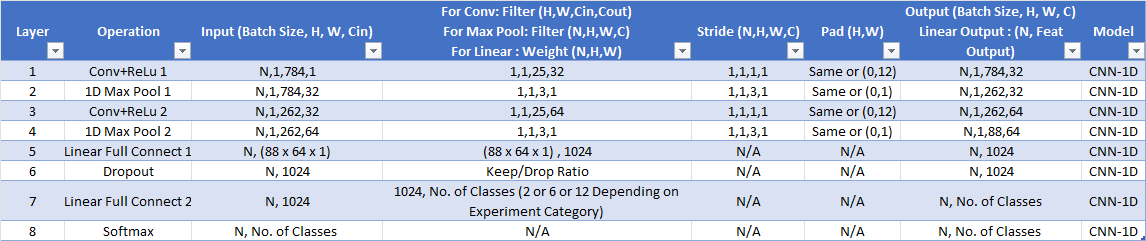

b) CNN-2D Model
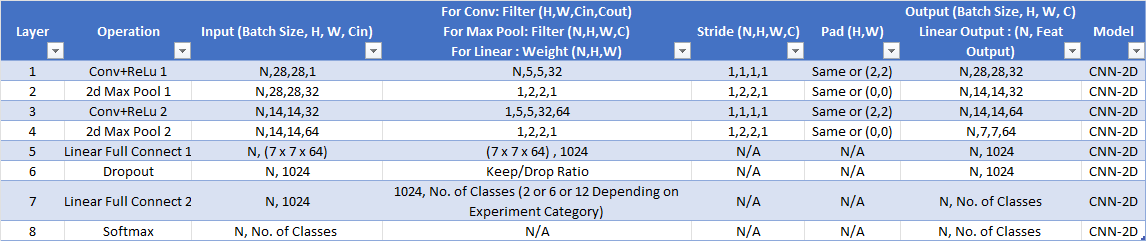

In [ ]:
# Convolutional Neural Net
class CNN1d(nn.Module): #1D Layer
    def __init__(self, feat=12, drop=0.9):
      #Tunable with only the keep probability in this variable 'drop'
        super().__init__()
        self.conv1=nn.Conv1d(in_channels=1, out_channels=32, kernel_size=25, stride=1, padding='same', bias=True)
        self.relu1=nn.ReLU(inplace=True)
        self.max1=nn.MaxPool1d(kernel_size=3, stride=3, padding=1)
        self.conv2=nn.Conv1d(in_channels=32, out_channels=64, kernel_size=25, padding='same' , bias=True)
        self.relu2=nn.ReLU(inplace=True)
        self.max2=nn.MaxPool1d(kernel_size=3, stride=3, padding=1)

        # Linear Classifier Section
        self.lin1=nn.Linear(in_features=64*88, out_features=1024, bias=True)
        self.relu3=nn.ReLU(inplace=True)
        self.drop1=nn.Dropout(inplace=False, p=drop)
        self.lin2=nn.Linear(in_features=1024, out_features = feat, bias=True)

        self.soft=nn.Softmax(dim=1)

    def forward(self, x):

        x=(x-0)/(255-0) #Normalization
        x0 = x.view(-1, 1, 784) #Change the data to a 1D format

        x1 = self.max1(self.relu1(self.conv1(x0)))
        x2 = self.max2(self.relu2(self.conv2(x1)))

        x2_=x2.view(-1,x2.shape[1]*x2.shape[2]) #Flatten

        x3 = self.relu3(self.lin1(x2_))
        x3 = self.drop1(x3)
        x4 = self.lin2(x3)

        return x4

class CNN2d(nn.Module):
  #2D Model
    def __init__(self, feat=12, drop=0.9
                 , K=[(5,5),(2,2),(5,5),(2,2)] , S=[(1,1),(2,2),(1,1),(2,2)], \
                 Cout=[32,64], P=['same',(0,0),'same',(0,0)], B=[True,None,True,None], \
                 wLin=[1024], bn=True):
      #Tunable with multiple parameters but we only effectively used variations of the model keep probability in this version via "drop" variable
        super().__init__()

        self.bn1=nn.BatchNorm2d(num_features=1) if bn==True else nn.Identity()

        self.conv1=nn.Conv2d(in_channels=1, out_channels=Cout[0], kernel_size=K[0], stride=S[0], padding=P[0], bias=B[0])
        self.relu1=nn.ReLU(inplace=True)
        self.max1=nn.MaxPool2d(kernel_size=K[1], stride=S[1], padding=P[1],ceil_mode=False)

        self.conv2=nn.Conv2d(in_channels=Cout[0], out_channels=Cout[1], kernel_size=K[2],stride=S[2],padding=P[2] , bias=B[2])
        self.relu2=nn.ReLU(inplace=True)
        self.max2=nn.MaxPool2d(kernel_size=K[3], stride=S[3], padding=P[3],ceil_mode=False)

        self.lin1=nn.Linear(in_features=64*7*7, out_features=wLin[0], bias=True)
        self.relu3=nn.ReLU(inplace=True)
        self.drop1=nn.Dropout(inplace=False, p=drop)
        self.lin2=nn.Linear(in_features=1024, out_features = feat, bias=True)

        self.soft=nn.Softmax(dim=1)

    def forward(self, x):

        xn=(x-0)/(255-0) #Normalization

        x0_ = (self.bn1(xn)).view(-1, 1, 28,28).type(dtype=torch.float32) #2D and long to float conversion


        x1=self.conv1(x0_)


        x1_ = self.max1(self.relu1(x1))


        x2=self.conv2(x1_)


        x2_ = self.max2(self.relu2(x2))


        x2__=x2_.view(-1,x2_.shape[1]*x2_.shape[2]*x2_.shape[3]) #Flatten


        x3 = self.relu3(self.lin1(x2__))


        x4 = self.drop1(x3)

        x5 = self.lin2(x4)


        return x5

In [ ]:
def loadModel(model, optimizer, modelSavePath='checkpoint.pth'): 
  #loads a model given its model object, optimizer object and the file save
  #can be used as a utility function since we are saving the models automatically in separate folders
  #and keeping the model metrics in separate files
  checkpoint = torch.load(modelSavePath)
  model.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  best_epoch = checkpoint['epoch']
  best_loss = checkpoint['loss']
  return model, optimizer,  best_epoch , best_loss

In [ ]:
def modelParametersSummary(model,batchSampleX,detailed=True):
  #Display detailed or summarized info about a model given its object and a batch sample
  pytorch_total_params = sum(p.numel() for p in model.parameters())
  print(f"pytorch_total_params {pytorch_total_params}")
  if detailed==True: torchsummary.summary(model, batchSampleX.shape[1:], batchSampleX.shape[0] )
  return pytorch_total_params

In [ ]:
def hyperParamGenerator(model_dependent, model_independent, category):
  # The function will accept a list of model dependent and model indepenent lists and will output a cross product of the parameters with a fixed model and optimizer objec
  # Can be used sepatarely as a utility function but no longer used in this version since we decided to use Pandas instead
  feat=category[0]
  hyper1=list(itertools.product(*model_dependent))
  for i,hyperParam1 in enumerate(hyper1):
    drop_prob, = hyperParam1
    model = CNN2(feat=feat,drop=drop_prob).to(device)
    optimizers = [ optim.SGD(model.parameters(), lr=1e-4, momentum=0.9) , optim.Adam(model.parameters(), lr = 1e-3)]
    hyper2=list(itertools.product([model], optimizers, *model_dependent, *model_independent ))
  return hyper2


In [ ]:

def generateModelOptimizerPd( model_pre, model_optimizers ):
#Takes a list of Pre-initiation Model class in a json format ( name of the model class and parameters to be passed to it)
# and the optimizer json string (optimizer name and parameters like LR, Weight Decay and Momentum)
# we tested CNN1d and CNN2d + SGD and ADAM Optimizer with tunable Learning Rates and Weight Decay values, momentum is used with SGD

  #convert model JSON into a dataframe for easier handling
  model_pre_pd=pd.DataFrame(index=model_pre.keys(),data=model_pre.values()) 

  for col in model_pre_pd.columns: #This loop expands a list cell in pandas into multiple columns
    model_pre_pd=model_pre_pd.explode(col) 
  model_pre_pd.reset_index(inplace=True,names=['model']) #Reset index to re-align it with the new columns, and give a model number in 'model'


  #Repeat the same process for the optimizers json
  model_optimizers_pd=pd.DataFrame(index=model_optimizers.keys(),data=model_optimizers.values())
  

  for col in model_optimizers_pd.columns:
    model_optimizers_pd=model_optimizers_pd.explode(col)
  model_optimizers_pd.reset_index(inplace=True,names=['OptimizerType'])

  #Join the optimizers with the associated models as specified in the optimizers json 'model' key to link which optimizer to be used
  # with which model
  modelOptimizerPd=model_pre_pd.merge(model_optimizers_pd, right_on='model',left_on='model')

  return modelOptimizerPd 
  #Return a dataframe with Models joined with which optimziers to be used with
  # all in string format and will be converted into objects inside the training loop




In [ ]:
def generateHyperModel(modelOptimizersPd,model_independent ):
  #Cross product models-optimizers dataframe against the model independent parameters
  # Model independent parameter are like ; Validation Ratio, epochs, ...etc
  hyperModels=modelOptimizersPd.copy(deep=True)
  for hyper in model_independent:
    temp= pd.DataFrame(data=model_independent[hyper],columns=[hyper])
    hyperModels=hyperModels.merge(temp, how='cross')
  return hyperModels
  #Returns a dataframe with the cross product of models-optimizers-model independent hyper paramters

In [ ]:
def modelTuning( hyperModel,    criterion, device, train_iterator , valid_iterator  , filespath, stop=None):
  # A function to tune the models, it will accept a model, a loss function, a device, both training and validation iterators
  # and a path to save the best models in, and will also accept and early stoppage variable "stop"
  # "stop" will stop the model tuning if the model did not get an improvment in whichever criteria used for model evaluation after 'stop' epochs

  hyperModel['modelObj'].apply(initialize_parameters)
  min_loss=sys.maxsize
  max_acc=1
  stopMax=stop #Max epochs that afterwards the model is showing no improvement and the function will stop tuning it
  stopCtr=0 #a counter to keep track of when a model is showing improvement based on the tuner function (here we used Lowest Validation Loss Models)

  modelLossAcc=pd.DataFrame() #Data for this model for all Epochs containing Lossess and accuracies
  #it will be keyed by the model ID, key attribute indicating the model category (VPN or not, FLow or Session, etc..) and will contain
  #useful info such as the training and validation losses and accuracies
  #it will also keep track of the current epoch to put it in the dataframe is the early stoppage is triggered to indicate when the model training was forcibly stopped

  for j in range(hyperModel['EPOCHS']):
    modelLossAcc_epoch=pd.DataFrame() #Temp dataframe for tracking and filling in modelLossAcc,  will be reset on each epoch
    current_epoch=j

    loss_tr,acc_tr=train(hyperModel['modelObj'],train_iterator,optimizer,criterion,device) #Load the model object from the pandas dataframe 'modelObj' field
    #Then pass the model object and the training iterator,

    loss_val,acc_val=evaluate(hyperModel['modelObj'],valid_iterator,criterion,device) #Calculate the validation loss/accuracy for the trained model each epoch

    loss_tr,acc_tr,loss_val,acc_val=round(loss_tr,2),round(acc_tr,2),round(loss_val,2),round(acc_val,2) #approximate to nearest 2 digits for better display and faster calculations

    modelLossAcc_epoch=pd.DataFrame(data=[[hyperModel['key'],j,hyperModel['Model ID'],loss_tr,acc_tr,loss_val,acc_val]],columns=["key","Epoch","Model ID","Training Loss","Training Accuracy","Validation Loss","Validation Accuracy"])
    #Calculate the lossess/accuracies of this epoch and attach them to the model keys

    modelLossAcc=pd.concat([modelLossAcc,modelLossAcc_epoch]) #Add the epoch loss/accuracy details to the larger All models loss/accuracy data frame

    min_loss, modelSavePath,stopCtr = hyperModel['Epoch Selector Function']\ #Select or discard the model based on the "Epoch Selector Function" in the Hyper Models Data Frame
     (hyperModel['modelObj'], hyperModel['optimizerObj'] ,min_loss, j,\
      modelLossAcc_epoch ,hyperModel['key'],hyperModel['Epoch Selector Function Name'] ,filespath,stopCtr)
      #The function to selet which model can be changed itself from the hyper models data frame, in this version we implemented a "tuner" to select models only based on lowest validation loss
      # if no better validation loss happened in the next iteration then discard this model
      # The stop counter is also passed and returned in this function to track if a model training needs to be halted or not if no significant improvements happened over StopMax epochs
      
      #Other alternatives for the model selection could be ; Fixed Minimal Validation Loss, Best Training Loss, SE Rule,..etc

    if stopCtr==stopMax : 
      # If The stop counter reached the early stoppage StopMax, then halt model training and test another model
      print (f"Epoch {current_epoch} : Training Stopped after {stopMax} Epochs without improvement")
      print (f"Epoch {current_epoch} : New Min Val Loss = {loss_val} , Previous Min Val Loss={min_loss} ,New Val Acc = {acc_val} , Saving Model State at {modelSavePath} , Epoch Tr Stop Counter={stopCtr}")
      break


  return modelLossAcc,min_loss,modelSavePath,current_epoch 
  #REturn All models loss accuracy and best validation loss achieved, along with the model saved location and the last epoch the model got

In [ ]:
def modelSave_bestValLoss (model, optimizer, min_loss, currentEpoch, modelLossAcc_epoch, key, pathPrefix,filespath):
  #A previous function to save the models with the lowest validation errors without early stoppage.
  # Can be used as a separete utiliy function

  loss_val=modelLossAcc_epoch.loc[0]["Validation Loss"]
  acc_val=modelLossAcc_epoch.loc[0]["Validation Accuracy"]
  modelSavePath=f"{filespath}/{key}_{pathPrefix}.pth" #Save
  current_epoch=modelLossAcc_epoch.loc[0]["Epoch"]



  if loss_val<min_loss :
    if (current_epoch+1)%10==0 : print (f"Epoch {current_epoch} : New Min Val Loss = {loss_val} , Previous Min Val Loss={min_loss} ,New Val Acc = {acc_val} , Saving Model State at {modelSavePath} , Epoch Tr Stop Counter={stopCtr}")
    min_loss=loss_val
    min_epoch=current_epoch
    torch.save({
          'epoch': {current_epoch},
          'model_state_dict': model.state_dict(),
          'optimizer_state_dict': optimizer.state_dict(),
          'loss': loss_val,
          'acc' : acc_val
          }, modelSavePath)

    return min_loss,modelSavePath,
  else:
    if (current_epoch+1)%10==0 : print (f"Epoch {current_epoch} : New Min Val Loss = {loss_val} , Previous Min Val Loss={min_loss} , Model Not Saved, Epoch Tr Stop Counter={stopCtr}")
    return min_loss,modelSavePath

In [ ]:
def modelSave_bestValLoss_EarlyStop (model, optimizer, min_loss, currentEpoch, modelLossAcc_epoch, key, pathPrefix,filespath, stopCtr=0):
  #Function will receive a model and tune it for one epoch, and will save it if it achieved a lower validation loss than a previous value.
  #The pathPrefix specifies what will be the model name , we choose to name them based on their  classifiers category/1d or 2d/Model ID unique per run

  loss_val=modelLossAcc_epoch.loc[0]["Validation Loss"]
  acc_val=modelLossAcc_epoch.loc[0]["Validation Accuracy"]
  modelSavePath=f"{filespath}/{key}_{pathPrefix}.pth"
  current_epoch=modelLossAcc_epoch.loc[0]["Epoch"]


  if loss_val<min_loss :
    stopCtr=0
    if (current_epoch+1)%10==0 : print (f"Epoch {current_epoch} : New Min Val Loss = {loss_val} , Previous Min Val Loss={min_loss} , stopCtr={stopCtr} ,New Val Acc = {acc_val} , Saving Model State at {modelSavePath}")
        #Print Model dynamic data only each 10 epochs to avoid the noisy and resource intensive printing operations
    min_loss=loss_val
    min_epoch=current_epoch
    torch.save({
          'epoch': {current_epoch},
          'model_state_dict': model.state_dict(),
          'optimizer_state_dict': optimizer.state_dict(),
          'loss': loss_val,
          'acc' : acc_val
          }, modelSavePath)
    
    return min_loss,modelSavePath,stopCtr
  else:
    stopCtr=stopCtr+1
    if (current_epoch+1)%10==0 : print (f"Epoch {current_epoch} : New Min Val Loss = {loss_val} , Previous Min Val Loss={min_loss} , stopCtr={stopCtr} , Model Not Saved")
    return min_loss,modelSavePath,stopCtr

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:
            x = x.type(dtype=torch.float)
            x = x.to(device)
            y = y.to(device)

            y_pred = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return round(epoch_loss / len(iterator),2), round(epoch_acc / len(iterator),2)

In [ ]:
#Both functions are used to generate the confusion matrix for multiple labels in an easier fashion
# since we have 6 or 12 classess classifiers, it was easier to permute the confusion matrix into 4 quardants
# the first element is the TP, the first row except the first element is the FN
# the first column except the first element is the FP , and the rest of the matrix excluding the first row and column is the TN
def confusionMatrixPermute(confMatrix,j):
  #Permutes a confusion matrix based on a label order, to convert it to a standard easier 4-quadrants form 
  for i,class_ in enumerate(confMatrix):
    permute=[j]+[x for x in range (len(classes)) if x!=j]
    confMatrix_permuted= confMatrix[:,permute][permute,:]
    return confMatrix_permuted


def confusionMetrics(confMatrix):
  #Calculates the FP,TP,FN,TN of a standard-form confusion matrix, these values will be used in precision/recall/f1/accuracy per label
  TP=torch.sum(confMatrix[0,0]).cpu().data.numpy()
  FP=torch.sum(confMatrix[1:,0]).cpu().data.numpy()
  FN=torch.sum(confMatrix[0,1:]).cpu().data.numpy()
  TN=torch.sum(confMatrix[1:,1:]).cpu().data.numpy()
  metrics={"TP":TP,"FP":FP,"FN":FN,"TN":TN}
  return metrics


In [ ]:

def get_predictions(model, iterator, device):

    model.eval()

    labels = []
    probs = []

    epoch_loss = 0
    epoch_acc = 0

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device=device, dtype=torch.float)
            x = x.to(device)
            y = y.to(device)

            y_pred = model(x)

            # get softmax
            softmax = scipy.special.softmax(y_pred.cpu(), axis = 1)
            pred = torch.tensor(np.argmax(softmax, axis=1))

            labels.append(y)
            probs.append(y_pred)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()


    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return labels, probs

In [ ]:
def train_with_CLR_algo(model, iterator, optimizer,scheduler, criterion, device):

    epoch_loss = 0
    epoch_acc = 0
    

    model.train()

    for (x, y) in iterator:

        x = x.to(device=device, dtype=torch.float)
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)


        loss.backward()

        optimizer.step()
        scheduler.step()## utilises the CLR policy for changing learning rate

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def modelTuning_with_CLR( hyperModel,    criterion, device, train_iterator , valid_iterator  , filespath, stop=None):
  # A function to tune the models, it will accept a model, a loss function, a device, both training and validation iterators
  # and a path to save the best models in, and will also accept and early stoppage variable "stop"
  # "stop" will stop the model tuning if the model did not get an improvment in whichever criteria used for model evaluation after 'stop' epochs

  hyperModel['modelObj'].apply(initialize_parameters)
  min_loss=sys.maxsize
  max_acc=1
  stopMax=stop #Max epochs that afterwards the model is showing no improvement and the function will stop tuning it
  stopCtr=0 #a counter to keep track of when a model is showing improvement based on the tuner function (here we used Lowest Validation Loss Models)

  modelLossAcc=pd.DataFrame() #Data for this model for all Epochs containing Lossess and accuracies
  #it will be keyed by the model ID, key attribute indicating the model category (VPN or not, FLow or Session, etc..) and will contain
  #useful info such as the training and validation losses and accuracies
  #it will also keep track of the current epoch to put it in the dataframe is the early stoppage is triggered to indicate when the model training was forcibly stopped

  for j in range(hyperModel['EPOCHS']):
    modelLossAcc_epoch=pd.DataFrame() #Temp dataframe for tracking and filling in modelLossAcc,  will be reset on each epoch
    current_epoch=j
    
    #The below line is added to tune the learning rate algorithmically by CLR algorithm
    scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.01, max_lr=0.1)
    ## the above line of code is for cyclical learning rate algorithm
    
    loss_tr,acc_tr=train(hyperModel['modelObj'],scheduler,train_iterator,optimizer,criterion,device) #Load the model object from the pandas dataframe 'modelObj' field
    #Then pass the model object and the training iterator,

    loss_val,acc_val=evaluate(hyperModel['modelObj'],valid_iterator,criterion,device) #Calculate the validation loss/accuracy for the trained model each epoch

    loss_tr,acc_tr,loss_val,acc_val=round(loss_tr,2),round(acc_tr,2),round(loss_val,2),round(acc_val,2) #approximate to nearest 2 digits for better display and faster calculations

    modelLossAcc_epoch=pd.DataFrame(data=[[hyperModel['key'],j,hyperModel['Model ID'],loss_tr,acc_tr,loss_val,acc_val]],columns=["key","Epoch","Model ID","Training Loss","Training Accuracy","Validation Loss","Validation Accuracy"])
    #Calculate the lossess/accuracies of this epoch and attach them to the model keys

    modelLossAcc=pd.concat([modelLossAcc,modelLossAcc_epoch]) #Add the epoch loss/accuracy details to the larger All models loss/accuracy data frame

    min_loss, modelSavePath,stopCtr = hyperModel['Epoch Selector Function']\ #Select or discard the model based on the "Epoch Selector Function" in the Hyper Models Data Frame
     (hyperModel['modelObj'], hyperModel['optimizerObj'] ,min_loss, j,\
      modelLossAcc_epoch ,hyperModel['key'],hyperModel['Epoch Selector Function Name'] ,filespath,stopCtr)
      #The function to selet which model can be changed itself from the hyper models data frame, in this version we implemented a "tuner" to select models only based on lowest validation loss
      # if no better validation loss happened in the next iteration then discard this model
      # The stop counter is also passed and returned in this function to track if a model training needs to be halted or not if no significant improvements happened over StopMax epochs
      
      #Other alternatives for the model selection could be ; Fixed Minimal Validation Loss, Best Training Loss, SE Rule,..etc

    if stopCtr==stopMax : 
      # If The stop counter reached the early stoppage StopMax, then halt model training and test another model
      print (f"Epoch {current_epoch} : Training Stopped after {stopMax} Epochs without improvement")
      print (f"Epoch {current_epoch} : New Min Val Loss = {loss_val} , Previous Min Val Loss={min_loss} ,New Val Acc = {acc_val} , Saving Model State at {modelSavePath} , Epoch Tr Stop Counter={stopCtr}")
      break


  return modelLossAcc,min_loss,modelSavePath,current_epoch 
  #REturn All models loss accuracy and best validation loss achieved, along with the model saved location and the last epoch the model got

# Program Start

In [ ]:



SEED = 42 #Fixed random seed for random numbers reproducability

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

drive.mount('/content/drive') #Mount colab

datasetFilesPath="drive/MyDrive/DL_Project" #Path which contains the IDX-formatted dataset
#The pre-processed pcap files are generated from https://github.com/echowei/DeepTraffic/tree/master/2.encrypted_traffic_classification/3.PerprocessResults
#You would need to create a folder in colab, download and unzip the 3 folders in the github specified, and then provide this colab path in the datasetFilePath
#The path will be preceded by 'drive/MyDrive' 


All_Data=generateDatasetsColab(path=datasetFilesPath)
# Generate the dataset json object from the colab path specified, based on the MNIST/IDX standard format and naming convention
# the folder structure expected is explained in the function definition



for i, category in enumerate(All_Data.keys()):
  print (f"Dataset Experiment: {category}") #Print each category name (experiment in paper)

categories=list(All_Data.keys()) #List all categories in a single list 

#Ordered numeric labels of the t10k y-label files and their corresponding string labels
dict_2class = {0:'Novpn',1:'Vpn'}
dict_6class_novpn = {0:'Chat',1:'Email',2:'File',3:'P2p',4:'Streaming',5:'Voip'}
dict_6class_vpn = {0:'Vpn_Chat',1:'Vpn_Email',2:'Vpn_File',3:'Vpn_P2p',4:'Vpn_Streaming',5:'Vpn_Voip'}
dict_12class = {0:'Chat',1:'Email',2:'File',3:'P2p',4:'Streaming',5:'Voip',6:'Vpn_Chat',7:'Vpn_Email',8:'Vpn_File',9:'Vpn_P2p',10:'Vpn_Streaming',11:'Vpn_Voip'}

#A dictionary to be used for translating the y-lable files into their string labels 
dict_labels={(6,'Vpn'):dict_6class_vpn , (6,'Novpn'):dict_6class_novpn , 12:dict_12class , 2:dict_2class  }

#Use CUDA if possible, if not the use the CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')







Mounted at /content/drive
Path:drive/MyDrive/DL_Project
Folders in Path:
12class  Models_2023-05-14__12-18-17  Models_2023-05-14__22-59-39
2class	 Models_2023-05-14__16-47-17
6class	 Models_2023-05-14__19-56-09
Files extracted and unzipped from path: drive/MyDrive/DL_Project/2class/FlowAllLayers
Files extracted and unzipped from path: drive/MyDrive/DL_Project/2class/FlowL7
Files extracted and unzipped from path: drive/MyDrive/DL_Project/2class/SessionAllLayers
Files extracted and unzipped from path: drive/MyDrive/DL_Project/2class/SessionL7
Files extracted and unzipped from path: drive/MyDrive/DL_Project/12class/FlowAllLayers
Files extracted and unzipped from path: drive/MyDrive/DL_Project/12class/FlowL7
Files extracted and unzipped from path: drive/MyDrive/DL_Project/12class/SessionAllLayers
Files extracted and unzipped from path: drive/MyDrive/DL_Project/12class/SessionL7
Files extracted and unzipped from path: drive/MyDrive/DL_Project/6class/VpnFlowAllLayers
Files extracted and unzi

# Generating Models Hyper-paramters

In [ ]:
filespath=f"drive/MyDrive/DL_Project/Models_{datetime.now().strftime('%Y-%m-%d__%H-%M-%S')}"
#Generate a folder in colab in the specified path basde on the timestamp to save model data and metrics

valid_ratios=[0.8] 
# 0.9 was tested earlier but did not yield impressive results since the dataset is unbalanced
# The paper implemeneted 10-fold validation but we opted to use best validation loss for faster calculations and more models tested

batch_sizes= [50,128] #50 is the value used in paper
EPOCHS = [40,80] #40 is the value used in paper, we also used 60 epochs in previous separate runs,

#Models indepenent hyper parameters : these are not related to the model type and defined separately in this json
model_independent={"valid_ratios":valid_ratios, "batch_sizes":batch_sizes, "EPOCHS":EPOCHS }

#Model dependent hyper-parameters, in thisversion we tested mainly the drop probability, drop=0 means keep everything
#if a model string in the hyper models dataframe is CNN-1D, then use the specified drop probabilities.
model_pre={'CNN-1D':{"drop_probability":[0]}  #Accept a list of drop probabilities not just one, for example [0,0.9]
           ,'CNN-2D':{"drop_probability":[0]}
           }
# Define optimizers json that will be used to tune the models once they are calculated.
# The optimizers in this version are associated to every single model using the 'model' key in the json         
# All values can be lists, ex; SGD_momentum[0.9,0.8,0]  
model_optimizers={
    "SGD": {"SGD_LR":[1e-3,1e-2] , "SGD_momentum":[0.9],"SGD_WeightDecay":[0.9],'model': list(model_pre.keys())} #1e-3 , 0.0 , weight_decay
    ,"ADAM":{"ADAM_LR":[1e-3,1e-2], "ADAM_Weight_Decay":[0.9],'model': list(model_pre.keys())} # 1e-3 , weight_decay
                  }


modelOptimizersPd=generateModelOptimizerPd( model_pre, model_optimizers )
#Generate a dataframe of model-optimizers cross product

hyperModelsPd=generateHyperModel(modelOptimizersPd,model_independent )
#Generate a dataframe of models-optimizers-Model independent parameters(epochs, valid ration,...etc) cross product

#tunerSelector=[modelSave_bestValLoss]
tunerSelector=[modelSave_bestValLoss_EarlyStop]
#This is the function to select based on what criteria a model will be kept and saved, we call it a "tuner function" that is separate from the hyper-parameter tuned model selection in the end.
# in this run we used the lowest validation loss early stoppage, previously we used a similar function without early stoppage


hyperModels=hyperModelsPd.merge(pd.DataFrame(categories,columns=["Classifier Class","Connection","Protocol","Encryption"]), how='cross')
# Cross product all possible categories (experiments in paper) with each hyper-parameter model in the dataframe

hyperModels.reset_index(inplace=True)
# Reset the vertical index since the cross product operation shuffles and duplicates its values

tunerSelectorPd=pd.DataFrame(data=tunerSelector,columns=["Epoch Selector Function"])
# Generate a dataframe for all possible model tuners, we add it in this manner to allow -in future versions- to use multiple methods in models selection

hyperModels=hyperModels.merge(tunerSelectorPd, how='cross')
# Assign the function for models tuners as a cross product to all models, we add it in this manner to allow -in future versions- to use multiple methods in models selection

hyperModels['Epoch Selector Function Name']=hyperModels.apply(lambda x: x['Epoch Selector Function'].__name__, axis=1)
#Pick the tuner function string names for eaiser readbility 

hyperModels=hyperModels.rename(columns={"index":"Model ID"})
#Add a sequential unique model ID per each run of this section -and training loop later-

hyperModels['key']=hyperModels.apply(lambda x: "-".join([str(x['Classifier Class']),x['Connection'],x['Protocol'],str(x['Encryption']),str(x['model']),str(x['Model ID'])]), axis=1)
#Add a category key similar to the category variable defined previously defined, but add in the models ID and model names.
#If we needed a reterival for models then we add also the folder name to distinguish models from separate runs that will share the same ID


print(f"device: {device}, torch.version.cuda {torch.version.cuda}")
#Print the current device


hyperModels=hyperModels.sort_values(by=['Classifier Class','Connection','Protocol','Encryption','model','Model ID'], ascending=False)
#Sort all hyper models by classess to start on the higher 12 class, then 6-class then the easiest 2-class

hyperModels=hyperModels.reset_index(drop=True)
#Reset the index just in case other cross products we could have added later

device: cuda, torch.version.cuda 11.8


In [ ]:
hyperModels=hyperModels[  hyperModels['Classifier Class']==12 ].reset_index(drop=True)
#Sample display of 12-class hyper-parameters-model dataframe

,Model ID,model,drop_probability,OptimizerType,SGD_LR,SGD_momentum,SGD_WeightDecay,ADAM_LR,ADAM_Weight_Decay,valid_ratios,batch_sizes,EPOCHS,Classifier Class,Connection,Protocol,Encryption,Epoch Selector Function,Epoch Selector Function Name,key
0,503,CNN-2D,0,ADAM,NaN,NaN,NaN,0.01,0.9,0.8,128,80,12,Session,L7,None,<function modelSave_bestValLoss_EarlyStop at 0...,modelSave_bestValLoss_EarlyStop,12-Session-L7-None-CNN-2D-503
1,487,CNN-2D,0,ADAM,NaN,NaN,NaN,0.01,0.9,0.8,128,40,12,Session,L7,None,<function modelSave_bestValLoss_EarlyStop at 0...,modelSave_bestValLoss_EarlyStop,12-Session-L7-None-CNN-2D-487
2,471,CNN-2D,0,ADAM,NaN,NaN,NaN,0.01,0.9,0.8,50,80,12,Session,L7,None,<function modelSave_bestValLoss_EarlyStop at 0...,modelSave_bestValLoss_EarlyStop,12-Session-L7-None-CNN-2D-471
3,455,CNN-2D,0,ADAM,NaN,NaN,NaN,0.01,0.9,0.8,50,40,12,Session,L7,None,<function modelSave_bestValLoss_EarlyStop at 0...,modelSave_bestValLoss_EarlyStop,12-Session-L7-None-CNN-2D-455
4,439,CNN-2D,0,ADAM,NaN,NaN,NaN,0.001,0.9,0.8,128,80,12,Session,L7,None,<function modelSave_bestValLoss_EarlyStop at 0...,modelSave_bestValLoss_EarlyStop,12-Session-L7-None-CNN-2D-439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,68,CNN-1D,0,SGD,0.01,0.9,0.9,NaN,NaN,0.8,50,40,12,Flow,AllLayers,None,<function modelSave_bestValLoss_EarlyStop at 0...,modelSave_bestValLoss_EarlyStop,12-Flow-AllLayers-None-CNN-1D-68
124,52,CNN-1D,0,SGD,0.001,0.9,0.9,NaN,NaN,0.8,128,80,12,Flow,AllLayers,None,<function modelSave_bestValLoss_EarlyStop at 0...,modelSave_bestValLoss_EarlyStop,12-Flow-AllLayers-None-CNN-1D-52
125,36,CNN-1D,0,SGD,0.001,0.9,0.9,NaN,NaN,0.8,128,40,12,Flow,AllLayers,None,<function modelSave_bestValLoss_EarlyStop at 0...,modelSave_bestValLoss_EarlyStop,12-Flow-AllLayers-None-CNN-1D-36
126,20,CNN-1D,0,SGD,0.001,0.9,0.9,NaN,NaN,0.8,50,80,12,Flow,AllLayers,None,<function modelSave_bestValLoss_EarlyStop at 0...,modelSave_bestValLoss_EarlyStop,12-Flow-AllLayers-None-CNN-1D-20


# Trial 1

In [ ]:
stopMax=15
# Early stoppage variable, determines after how many epochs should the training stop if no improvement was reached in the validation loss.
# Set to -1 or None if not required

download=False #a trivial variable to determine if the colab script will need to download files to the local disk or not

modelLossAcc=pd.DataFrame() # Dataframe for tracking all models test/training lossess and accuracies for all epochs, so it is a larger file that can be used to track models history
modelTest=pd.DataFrame() #Dataframe for tacking all models test lossess and accuracies, should be a lighter version of modelLossAcc
confMetrics=pd.DataFrame() #Confusion Matrices for all labels in all classess based on the test data predicitons vs the actual test labels

print(f"============================================================")
!mkdir {filespath}
print(f"============================================================")
print(f"Models Data Will be saved in Folder: {filespath}")

print(f"Number of Models to be trained and evaluated : {len(hyperModels)}")
print(f"============================================================")

tStartTrainLoop= time.time()

for i, hyperModel in hyperModels.iterrows(): #Loop through all the hyper-paramter models
  tStartModelIteration=time.time() #Timer start for a single Model Iteration , Iteration is Tuning+Testing+Confusion Matrix Metris Calculations
  modelLossAcc_epoch=pd.DataFrame() #Temp Dataframe for this model lossess/accuracies per model, will be reset for each model
  modelTsAccLoss=pd.DataFrame() #Temp Dataframe for this model Test Accuracy/Loss , will be reset for each model  

  print(f"___________________________________________________________")
  print(f"Progress : Model {i} out of {len(hyperModels)} - Progress Percentage : {round(i/len(hyperModels)*100,2)}") #Progress Percentage, How many model out of all hyper-paramter-Model

  
  #Model Id info 
  print (f"Experiment : {hyperModel['Classifier Class']},{hyperModel['Connection']},{hyperModel['Protocol']},{hyperModel['Encryption']}, Model ID : {hyperModel['Model ID']}")
  print (f"Model Index: {i}, Model ID: {hyperModel['Model ID']} , Model Key: {hyperModel['key']}")
  print(f"___________________________________________________________")


  #Define Model object and Optimizer objects basde on the this json, the objects are defined dynamically to avoid crashing colab if the object data is appended to the dataframe as we did in the previous versions
  hyperModel['modelObj']=CNN1d(feat=int(hyperModel['Classifier Class']),drop=hyperModel['drop_probability']) if (hyperModel['model']=='CNN-1D') \
  else CNN2d(feat=int(hyperModel['Classifier Class']),drop=hyperModel['drop_probability'])

  hyperModel['optimizerObj']=torch.optim.SGD(hyperModel['modelObj'].parameters(), lr=hyperModel['SGD_LR'], momentum=hyperModel['SGD_momentum'] ) if hyperModel['OptimizerType']=='SGD' else \
  torch.optim.Adam(hyperModel['modelObj'].parameters(), lr=hyperModel['ADAM_LR'], weight_decay=hyperModel['ADAM_Weight_Decay']) if hyperModel['OptimizerType']=='ADAM' else None



  #Placeholder variables for easier calling instead of the longer name, also will move the model to the device used
  model, optimizer, valid_ratio, batch_size, epoch,= \
      hyperModel['modelObj'].to(device),hyperModel['optimizerObj'], hyperModel['valid_ratios'] , hyperModel['batch_sizes'] , hyperModel['EPOCHS']

  #Define a category (experiment in paper) variable that identifies the dataset to be used, when 6-calss is used then 'Encryption' key will have a value, otherwise it will none or null or
  category=(hyperModel['Classifier Class'],hyperModel['Connection'],hyperModel['Protocol']) if hyperModel['Encryption'] is None  \
  else (hyperModel['Classifier Class'],hyperModel['Connection'],hyperModel['Protocol'],hyperModel['Encryption'])


  #If we are using 1D or 2D then adjust the dataDim variable that will re-shape the input data
  if hyperModel['model'].find('1D')!=-1:
    dataDim=1
  elif hyperModel['model'].find('2D')!=-1:
    dataDim=2

  # Generate iterators for Train/Test
  train_data,train_labels, test_data,test_labels=createDataset(category , All_Data, dataDim=dataDim)


  # Generate Validation Data based on Validation Ratio
  train_data, valid_data= splitValidation(train_data, VALID_RATIO=hyperModel['valid_ratios'])

  #if i==0 : printSampleData(train_data,train_labels,i=0) #For printing some info about the sample data if needed, we could use it only for the first run

  #Generate Iterators
  train_iterator = generateIterators(train_data,batch_size=hyperModel['batch_sizes'] ,Train=True)
  valid_iterator = generateIterators(valid_data, batch_size=hyperModel['batch_sizes'] ,Train=False)
  test_iterator = generateIterators(test_data,batch_size=hyperModel['batch_sizes'] ,Train=False)


  #Define Loss Function
  criterion = nn.CrossEntropyLoss()
  criterion = criterion.to(device)


  print(f"___________________________________________________________")

  print (f"Tuning Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")

  #Get a batch sample
  sampleBatchX,sampleBatchy= batchSample(train_iterator,i=0)


  #Display some info about the model and collect the number of trainable parameters in millions, this info can be used in cost function criteria for selecting the best hyper-parameters models
  trainableParameters=modelParametersSummary(model,sampleBatchX,detailed=False)/1000000
  hyperModels.loc[i,'trainableParameters 1E6']=trainableParameters

  #Time counter for the Model Tuning only
  tStart= time.time()
  
  #Tune the model, provide early stopping if needed
  #Collect the model accuracy/lossess for validation and training, the min. validation loss, the final model save location and the epoch at which the training stopped
  modelLossAcc_epoch,min_loss,modelSavePath, epoch_stop = \
    modelTuning( hyperModel,    criterion, device, train_iterator , valid_iterator , filespath , stop=stopMax)

  #Time counter ends for model tuning
  tEnd= time.time()


  duration=round(tEnd-tStart,2) 
  print (f"Finished Tuning Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in {duration} seconds")
  print(f"___________________________________________________________")

  #Model tuning duration is recorded and can be used as an input to a hyper-paramter model selection cost function
  hyperModels.loc[i,'duration']=duration

  #Recordthe Training/Validation Losses/Accuracies and the Last Epoch in the models hyper-paramters DataFrame
  hyperModels.loc[i,'Training Accuracy']=modelLossAcc_epoch['Training Accuracy'].iloc[-1]
  hyperModels.loc[i,'Training Loss']=modelLossAcc_epoch['Training Loss'].iloc[-1]
  hyperModels.loc[i,'Validation Accuracy']=modelLossAcc_epoch['Validation Accuracy'].iloc[-1]
  hyperModels.loc[i,'Validation Loss']=modelLossAcc_epoch['Validation Loss'].iloc[-1]
  hyperModels.loc[i,'Epoch Stop']=epoch_stop


  print (f"Saving Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in Folder: {modelSavePath}")

  #Record modelsave location
  hyperModels.loc[i,'modelSavePath']=modelSavePath

  #Download it if needed , but it will take some time and disrupt the tuning process print statements since it will run in parallel
  if download==True : files.download(modelSavePath)

  #Record all Lossess in the Larger Models Accuracies Data Farme from the temp dataframe modelLossAcc_epoch to modelLossAcc
  modelLossAcc=pd.concat([modelLossAcc,modelLossAcc_epoch])

  #print(f"___________________________________________________________")
  print (f"Testing Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  #Generate the Testing Loss/Accuracy for the tuned Model
  loss_test,acc_test=evaluate(hyperModel['modelObj'],test_iterator,criterion,device)


  #Save the model Test Loss/Accuracy in the temp dataframe modelTsAccLoss, plus the category, model key information and the duration
  modelTsAccLoss=pd.DataFrame(data=[[hyperModel['Model ID'],hyperModel['key'],hyperModel['Classifier Class'], hyperModel['Connection'],hyperModel['Protocol'],hyperModel['Encryption'],loss_test,acc_test,duration]]\
                         ,columns=["Model ID","key","Classifier Class","Connection","Protocol","Encryption","Test Loss","Test Accuracy","duration"]
                         )
  
  #Record all the test Lossess in the Larger Models Accuracies Data Farme from the temp dataframe modelTsAccLoss to modelTest
  modelTest=pd.concat([modelTest,modelTsAccLoss])


  #Add another copy for the test loss and accuracy to the larger hyper-paramters model dataframe
  hyperModels.loc[i,'Test Loss'],hyperModels.loc[i,'Test Accuracy']=modelTsAccLoss['Test Loss'].iloc[-1],modelTsAccLoss['Test Accuracy'].iloc[-1]


  print (f"Test Loss = {modelTsAccLoss['Test Loss'].loc[0]}, Test Accuracy = {modelTsAccLoss['Test Accuracy'].loc[0]}")
  print(f"___________________________________________________________")

  #Generat predictions, but first convert the numeric classess to the string labels by using the correct json dictionary based on the category field
  #Again take note of the VPN or novpn 3rd field will only be used with category[0]=6 (6-class classifiers)
  classes=list(dict_labels[(category[0]) if category[0]!=6 else (category[0],category[3])].values())
  labels, probs = get_predictions(hyperModel['modelObj'], test_iterator, device)
  pred_labels = torch.argmax(probs, 1)

  #Generate the confusion matrix normalized to the overall summation of the matrix elements not just rows
  confmat = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=len(classes),normalize='all').to(device)
  confMatrix=confmat(pred_labels, labels )

  #Temp dataframes for Confusion Matrix
  
  
  #This one is a placeholder for the per-class (per-label) Precision/Recall/F1
  # A loop will iterate for each label in a model, calculate Precision/Recall/Accuracy/F1 for this label based on Testing data
  # then will add these details per label + Model Id and key info to this Dataframe
  #All the info here per model will be added to the larger confMetrics DataFrame
  metricsModel=pd.DataFrame()


  # Loop through all classess (lables) in this category (experiment) to generte its confusion matrix in a standard form (more info in the functions definition)
  for j,class_ in enumerate(classes):
    temp=confusionMatrixPermute(confMatrix.to(device),j) #Temp for the confusion matrix permuted to have the required class TP values as the first element in the matrix
    #Temp will hold the TP/FP/TN/FN values of the matrix

    # Approximate the values to the nearest 2 digits.
    metrics=round( pd.DataFrame(confusionMetrics(temp),index=[0]) , 2)
    
    
    #Add model ID info to each class row entry
    metrics['key']=hyperModel['key']
    metrics['Model ID']=hyperModel['Model ID']
    metrics['Classifier Class']=hyperModel['Classifier Class']
    metrics['Label Name']=class_
    metrics['Label ID']=j
    metrics['Connection']=hyperModel['Connection']
    metrics['Protocol']=hyperModel['Protocol']
    metrics['Encryption']=hyperModel['Encryption']

    #Calculate Per-Class Precision/Accuracy/F1/Accuracy from the TP/FP/TN/FN values
    metrics['Label Precision']=round(metrics['TP']/(metrics['TP']+metrics['FP']),2)
    metrics['Label Recall']=round(metrics['TP']/(metrics['TP']+metrics['FN']),2)
    metrics['Label Accuracy']=round((metrics['TP']+metrics['TN'])/(metrics['TP']+metrics['FN']+metrics['TN']+metrics['FP']),2)
    metrics['Label F1']=round(2*((metrics['Label Precision']*metrics['Label Recall'])/(metrics['Label Precision']+metrics['Label Recall'])) , 2)

    #Add the per-lable metrics to the metricsModel dataframe, which is also a temp place-holder
    metricsModel=pd.concat([metricsModel, metrics])

  #Hyper-parameters model dataframe will only store the average of TP/FP/FN/TN/Precision/Recall/ACcuracy/F1 for all labels within a tuned model, the detailed data will be sstored in confMetrics
  hyperModels.loc[i,'Avg-TP'],hyperModels.loc[i,'Avg-FP'],hyperModels.loc[i,'Avg-FN'],hyperModels.loc[i,'Avg-TN']=\
  round( metricsModel[['TP','FP','FN','TN']].mean() , 2)

  hyperModels.loc[i,'Avg-Precision'],hyperModels.loc[i,'Avg-Recall'],hyperModels.loc[i,'Avg-Accuracy'],hyperModels.loc[i,'Avg-F1']=\
  round( metricsModel[['Label Precision','Label Recall','Label Accuracy','Label F1']].mean() , 2)

  confMetrics=pd.concat([confMetrics, metricsModel])

  #Printing and Plotting the Confusion Matrices, this part is suppressed since Colab will only print after the models training when +20 figures are required.
  #print(f"___________________________________________________________")
  #print(f"Confusion Matrix for Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  #print(f"{metricsModel}")


  #print(f"Confusion Matrix Per Label for Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  #plot_confusion_matrix(labels,pred_labels,classes,category,hyperModel['key'])
  #print(f"___________________________________________________________")

  tEndModelIteration=time.time() #End Timer for whole model iteraion (Tuning+Testing+Confusion Matrix Calculations)
  tModelIterationDuration=round ( tEndModelIteration-tStartModelIteration , 2 )
  print(f"Finished tuning and testing Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in {tModelIterationDuration} Seconds")

#Reset index if needed to avoid any index duplications due to cross products and concatinations
confMetrics.reset_index(drop=True)
modelTest.reset_index(drop=True)

#End timer for all models training time
tEndTrainLoop= time.time()

#Calculate time taken to tune all models + testing them + saving the cofusion functoon metrics
durationTraining=tEndTrainLoop-tStartTrainLoop
print(f"Duration of Models Training Loop : {durationTraining} seconds, averaging {round( durationTraining/len(hyperModels), 2)} Seconds")


#Save the hyper-parameters model data and the test metrics to csv files in colab
hyperModels.to_csv(f'{filespath}/hyperModels.csv')
modelLossAcc.to_csv(f'{filespath}/modelLossAcc.csv')
modelTest.to_csv(f'{filespath}/modelTest.csv')
confMetrics.to_csv(f'{filespath}/confMetrics.csv')


Models Data Will be saved in Folder: drive/MyDrive/DL_Project/Models_2023-05-14__16-47-17
Number of Models to be trained and evaluated : 128
___________________________________________________________
Progress : Model 0 out of 128 - Progress Ratio : 0.0
Experiment : 12,Session,L7,None, Model ID : 503
Model Index: 0, Model ID: 503 , Model Key: 12-Session-L7-None-CNN-2D-503
___________________________________________________________
Category (12, 'Session', 'L7')
train_data.shape (29193, 1, 28, 28), train_labels.shape (29193,)
test_data.shape (3244, 1, 28, 28), test_labels.shape (3244,)
___________________________________________________________
Tuning Hyper Model 0, for Experiment 12-Session-L7-None-CNN-2D-503 - Model ID 503
pytorch_total_params 3276686
Epoch 9 : New Min Val Loss = 2.43 , Previous Min Val Loss=2.18 , stopCtr=9 , Model Not Saved
Epoch 15 : Training Stopped after 15 Epochs without improvement
Epoch 15 : New Min Val Loss = 2.43 , Previous Min Val Loss=2.18 ,New Val Acc = 0

## Saving Models Metrics to Colab

In [ ]:
hyperModels.to_csv(f'{filespath}/hyperModels.csv')
modelLossAcc.to_csv(f'{filespath}/modelLossAcc.csv')
modelTest.to_csv(f'{filespath}/modelTest.csv')
confMetrics.to_csv(f'{filespath}/confMetrics.csv')


# Trial 2
For each new trial, we run the system again by generating a new folder name and different set of hyper-paramters and re-run

In [ ]:
filespath=f"drive/MyDrive/DL_Project/Models_{datetime.now().strftime('%Y-%m-%d__%H-%M-%S')}"

valid_ratios=[0.8] #0.9 Previous Tests did not yield good results using this validation ration

batch_sizes= [50,128] #50 Paper parameters
EPOCHS = [40,80] #40 Paper paramters

model_independent={"valid_ratios":valid_ratios, "batch_sizes":batch_sizes, "EPOCHS":EPOCHS }

#Model dependent hyper-parameters
model_pre={'CNN-1D':{"drop_probability":[0]} 
           ,'CNN-2D':{"drop_probability":[0]}
           }
model_optimizers={
    "SGD": {"SGD_LR":[1e-3,1e-2] , "SGD_momentum":[0.9],"SGD_WeightDecay":[0.9],'model': list(model_pre.keys())} #1e-3 , 0.0 , weight_decay
    ,"ADAM":{"ADAM_LR":[1e-3,1e-2], "ADAM_Weight_Decay":[0.9],'model': list(model_pre.keys())} # 1e-3 , weight_decay
                  }


modelOptimizersPd=generateModelOptimizerPd( model_pre, model_optimizers )
hyperModelsPd=generateHyperModel(modelOptimizersPd,model_independent )

tunerSelector=[modelSave_bestValLoss_EarlyStop]

hyperModels=hyperModelsPd.merge(pd.DataFrame(categories,columns=["Classifier Class","Connection","Protocol","Encryption"]), how='cross')


hyperModels.reset_index(inplace=True)
tunerSelectorPd=pd.DataFrame(data=tunerSelector,columns=["Epoch Selector Function"])
hyperModels=hyperModels.merge(tunerSelectorPd, how='cross')
hyperModels['Epoch Selector Function Name']=hyperModels.apply(lambda x: x['Epoch Selector Function'].__name__, axis=1)

hyperModels=hyperModels.rename(columns={"index":"Model ID"})
hyperModels['key']=hyperModels.apply(lambda x: "-".join([str(x['Classifier Class']),x['Connection'],x['Protocol'],str(x['Encryption']),str(x['model']),str(x['Model ID'])]), axis=1)


print(f"device: {device}, torch.version.cuda {torch.version.cuda}")



hyperModels=hyperModels.sort_values(by=['Classifier Class','Connection','Protocol','Encryption','model','Model ID'], ascending=False)

hyperModels=hyperModels.reset_index(drop=True)

device: cuda, torch.version.cuda 11.8


# Trial 3

In [ ]:
stopMax=15
download=False
modelLossAcc=pd.DataFrame()
modelTest=pd.DataFrame()
confMetrics=pd.DataFrame()

print(f"============================================================")
!mkdir {filespath}
print(f"============================================================")
print(f"Models Data Will be saved in Folder: {filespath}")

print(f"Number of Models to be trained and evaluated : {len(hyperModels)}")
print(f"============================================================")

tStartTrainLoop= time.time()

for i, hyperModel in hyperModels.iterrows():
  tStartModelIteration=time.time()
  modelLossAcc_epoch=pd.DataFrame() #Temp
  modelTsAccLoss=pd.DataFrame()

  print(f"___________________________________________________________")
  print(f"Progress : Model {i} out of {len(hyperModels)} - Progress Ratio : {round(i/len(hyperModels)*100,2)}")

  print (f"Experiment : {hyperModel['Classifier Class']},{hyperModel['Connection']},{hyperModel['Protocol']},{hyperModel['Encryption']}, Model ID : {hyperModel['Model ID']}")
  print (f"Model Index: {i}, Model ID: {hyperModel['Model ID']} , Model Key: {hyperModel['key']}")
  print(f"___________________________________________________________")

  hyperModel['modelObj']=CNN1d(feat=int(hyperModel['Classifier Class']),drop=hyperModel['drop_probability']) if (hyperModel['model']=='CNN-1D') \
  else CNN2d(feat=int(hyperModel['Classifier Class']),drop=hyperModel['drop_probability'])

  hyperModel['optimizerObj']=torch.optim.SGD(hyperModel['modelObj'].parameters(), lr=hyperModel['SGD_LR'], momentum=hyperModel['SGD_momentum'] ) if hyperModel['OptimizerType']=='SGD' else \
  torch.optim.Adam(hyperModel['modelObj'].parameters(), lr=hyperModel['ADAM_LR'], weight_decay=hyperModel['ADAM_Weight_Decay']) if hyperModel['OptimizerType']=='ADAM' else None




  model, optimizer, valid_ratio, batch_size, epoch,= \
      hyperModel['modelObj'].to(device),hyperModel['optimizerObj'], hyperModel['valid_ratios'] , hyperModel['batch_sizes'] , hyperModel['EPOCHS']

  category=(hyperModel['Classifier Class'],hyperModel['Connection'],hyperModel['Protocol']) if hyperModel['Encryption'] is None \
  else (hyperModel['Classifier Class'],hyperModel['Connection'],hyperModel['Protocol'],hyperModel['Encryption'])

  #print(model, optimizer, valid_ratio, batch_size, epoch)


  if hyperModel['model'].find('1D')!=-1:
    dataDim=1
  elif hyperModel['model'].find('2D')!=-1:
    dataDim=2

  train_data,train_labels, test_data,test_labels=createDataset(category , All_Data, dataDim=dataDim)



  train_data, valid_data= splitValidation(train_data, VALID_RATIO=hyperModel['valid_ratios'])

  #if i==0 : printSampleData(train_data,train_labels,i=0)

  train_iterator = generateIterators(train_data,batch_size=hyperModel['batch_sizes'] ,Train=True)
  valid_iterator = generateIterators(valid_data, batch_size=hyperModel['batch_sizes'] ,Train=False)
  test_iterator = generateIterators(test_data,batch_size=hyperModel['batch_sizes'] ,Train=False)



  criterion = nn.CrossEntropyLoss()
  criterion = criterion.to(device)


# number of paramters



  #modelSavePath= f"model_{hyperModel['key']}_checkpoint"#.pth"
  print(f"___________________________________________________________")

  print (f"Tuning Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")

  sampleBatchX,sampleBatchy= batchSample(train_iterator,i=0)
  #print(x.shape)



  trainableParameters=modelParametersSummary(model,sampleBatchX,detailed=False)/1000000
  hyperModels.loc[i,'trainableParameters 1E6']=trainableParameters


  tStart= time.time()
  modelLossAcc_epoch,min_loss,modelSavePath, epoch_stop = \
    modelTuning( hyperModel,    criterion, device, train_iterator , valid_iterator , filespath , stop=stopMax)

  tEnd= time.time()
  duration=round(tEnd-tStart,2)
  print (f"Finished Tuning Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in {duration} seconds")
  print(f"___________________________________________________________")

  hyperModels.loc[i,'duration']=duration


  hyperModels.loc[i,'Training Accuracy']=modelLossAcc_epoch['Training Accuracy'].iloc[-1]
  hyperModels.loc[i,'Training Loss']=modelLossAcc_epoch['Training Loss'].iloc[-1]
  hyperModels.loc[i,'Validation Accuracy']=modelLossAcc_epoch['Validation Accuracy'].iloc[-1]
  hyperModels.loc[i,'Validation Loss']=modelLossAcc_epoch['Validation Loss'].iloc[-1]
  hyperModels.loc[i,'Epoch Stop']=epoch_stop


  print (f"Saving Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in Folder: {modelSavePath}")
  hyperModels.loc[i,'modelSavePath']=modelSavePath
  if download==True : files.download(modelSavePath)

  modelLossAcc=pd.concat([modelLossAcc,modelLossAcc_epoch])

  #print(f"___________________________________________________________")
  print (f"Testing Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  loss_test,acc_test=evaluate(hyperModel['modelObj'],test_iterator,criterion,device)

  modelTsAccLoss=pd.DataFrame(data=[[hyperModel['Model ID'],hyperModel['key'],hyperModel['Classifier Class'], hyperModel['Connection'],hyperModel['Protocol'],hyperModel['Encryption'],loss_test,acc_test,duration]]\
                         ,columns=["Model ID","key","Classifier Class","Connection","Protocol","Encryption","Test Loss","Test Accuracy","duration"]
                         )
  modelTest=pd.concat([modelTest,modelTsAccLoss])

  hyperModels.loc[i,'Test Loss'],hyperModels.loc[i,'Test Accuracy']=modelTsAccLoss['Test Loss'].iloc[-1],modelTsAccLoss['Test Accuracy'].iloc[-1]


  print (f"Test Loss = {modelTsAccLoss['Test Loss'].loc[0]}, Test Accuracy = {modelTsAccLoss['Test Accuracy'].loc[0]}")
  print(f"___________________________________________________________")

  classes=list(dict_labels[(category[0]) if category[0]!=6 else (category[0],category[3])].values())
  labels, probs = get_predictions(hyperModel['modelObj'], test_iterator, device)
  pred_labels = torch.argmax(probs, 1)

  confmat = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=len(classes),normalize='all').to(device)
  confMatrix=confmat(pred_labels, labels )


  metrics=pd.DataFrame()
  metricsModel=pd.DataFrame()

  for j,class_ in enumerate(classes):
    temp=confusionMatrixPermute(confMatrix.to(device),j)
    metrics=round( pd.DataFrame(confusionMetrics(temp),index=[0]) , 2)
    metrics['key']=hyperModel['key']
    metrics['Model ID']=hyperModel['Model ID']
    metrics['Classifier Class']=hyperModel['Classifier Class']
    metrics['Label Name']=class_
    metrics['Label ID']=j
    metrics['Connection']=hyperModel['Connection']
    metrics['Protocol']=hyperModel['Protocol']
    metrics['Encryption']=hyperModel['Encryption']

    metrics['Label Precision']=round(metrics['TP']/(metrics['TP']+metrics['FP']),2)
    metrics['Label Recall']=round(metrics['TP']/(metrics['TP']+metrics['FN']),2)
    metrics['Label Accuracy']=round((metrics['TP']+metrics['TN'])/(metrics['TP']+metrics['FN']+metrics['TN']+metrics['FP']),2)
    metrics['Label F1']=round(2*((metrics['Label Precision']*metrics['Label Recall'])/(metrics['Label Precision']+metrics['Label Recall'])) , 2)
    metricsModel=pd.concat([metricsModel, metrics])

  hyperModels.loc[i,'Avg-TP'],hyperModels.loc[i,'Avg-FP'],hyperModels.loc[i,'Avg-FN'],hyperModels.loc[i,'Avg-TN']=\
  round( metricsModel[['TP','FP','FN','TN']].mean() , 2)

  hyperModels.loc[i,'Avg-Precision'],hyperModels.loc[i,'Avg-Recall'],hyperModels.loc[i,'Avg-Accuracy'],hyperModels.loc[i,'Avg-F1']=\
  round( metricsModel[['Label Precision','Label Recall','Label Accuracy','Label F1']].mean() , 2)

  confMetrics=pd.concat([confMetrics, metricsModel])
  #print(f"___________________________________________________________")
  #print(f"Confusion Matrix for Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  #print(f"{metricsModel}")


  #print(f"Confusion Matrix Per Label for Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  #plot_confusion_matrix(labels,pred_labels,classes,category,hyperModel['key'])
  #print(f"___________________________________________________________")

  tEndModelIteration=time.time()
  tModelIterationDuration=round ( tEndModelIteration-tStartModelIteration , 2 )
  print(f"Finished tuning and testing Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in {tModelIterationDuration} Seconds")

confMetrics.reset_index(drop=True)
modelTest.reset_index(drop=True)

tEndTrainLoop= time.time()
durationTraining=tEndTrainLoop-tStartTrainLoop
print(f"Duration of Models Training Loop : {durationTraining} seconds, averaging {round( durationTraining/len(hyperModels), 2)} Seconds")



hyperModels.to_csv(f'{filespath}/hyperModels.csv')
modelLossAcc.to_csv(f'{filespath}/modelLossAcc.csv')
modelTest.to_csv(f'{filespath}/modelTest.csv')
confMetrics.to_csv(f'{filespath}/confMetrics.csv')


Streaming output truncated to the last 5000 lines.
test_data.shape (1226, 1, 784), test_labels.shape (1226,)
___________________________________________________________
Tuning Hyper Model 27, for Experiment 6-Session-L7-Vpn-CNN-1D-78 - Model ID 78
pytorch_total_params 5826438
Epoch 9 : New Min Val Loss = 0.19 , Previous Min Val Loss=0.16 , stopCtr=5 , Model Not Saved
Epoch 19 : New Min Val Loss = 0.2 , Previous Min Val Loss=0.16 , stopCtr=15 , Model Not Saved
Epoch 19 : Training Stopped after 15 Epochs without improvement
Epoch 19 : New Min Val Loss = 0.2 , Previous Min Val Loss=0.16 ,New Val Acc = 0.95 , Saving Model State at drive/MyDrive/DL_Project/Models_2023-05-14__19-56-09/6-Session-L7-Vpn-CNN-1D-78_modelSave_bestValLoss_EarlyStop.pth , Epoch Tr Stop Counter=15
Finished Tuning Hyper Model 27, for Experiment 6-Session-L7-Vpn-CNN-1D-78 - Model ID 78 in 24.46 seconds
___________________________________________________________
Saving Hyper Model 27, for Experiment 6-Session-L7-Vpn-CN

In [ ]:
hyperModels.to_csv(f'{filespath}/hyperModels.csv')
modelLossAcc.to_csv(f'{filespath}/modelLossAcc.csv')
modelTest.to_csv(f'{filespath}/modelTest.csv')
confMetrics.to_csv(f'{filespath}/confMetrics.csv')


# Trial 4
Without early stoppage for 12 and 6 classes

In [ ]:
filespath=f"drive/MyDrive/DL_Project/Models_{datetime.now().strftime('%Y-%m-%d__%H-%M-%S')}"

# opitmizer and loss functions
valid_ratios=[0.8] #0.9

batch_sizes= [50,128] #50
EPOCHS = [40,80] #40

model_independent={"valid_ratios":valid_ratios, "batch_sizes":batch_sizes, "EPOCHS":EPOCHS }

#Model dependent hyper-parameters
model_pre={'CNN-1D':{"drop_probability":[0]} #0 0.05 or 0.1
           ,'CNN-2D':{"drop_probability":[0]}
           }
model_optimizers={
    "SGD": {"SGD_LR":[1e-3,1e-2] , "SGD_momentum":[0.9],"SGD_WeightDecay":[0.9],'model': list(model_pre.keys())} #1e-3 , 0.0 , weight_decay
    ,"ADAM":{"ADAM_LR":[1e-3,1e-2], "ADAM_Weight_Decay":[0.9],'model': list(model_pre.keys())} # 1e-3 , weight_decay
                  }


modelOptimizersPd=generateModelOptimizerPd( model_pre, model_optimizers )
hyperModelsPd=generateHyperModel(modelOptimizersPd,model_independent )

#tunerSelector=[modelSave_bestValLoss]
tunerSelector=[modelSave_bestValLoss_EarlyStop]

###
hyperModels=hyperModelsPd.merge(pd.DataFrame(categories,columns=["Classifier Class","Connection","Protocol","Encryption"]), how='cross')

###



############

hyperModels.reset_index(inplace=True)
tunerSelectorPd=pd.DataFrame(data=tunerSelector,columns=["Epoch Selector Function"])
hyperModels=hyperModels.merge(tunerSelectorPd, how='cross')
hyperModels['Epoch Selector Function Name']=hyperModels.apply(lambda x: x['Epoch Selector Function'].__name__, axis=1)

hyperModels=hyperModels.rename(columns={"index":"Model ID"})
hyperModels['key']=hyperModels.apply(lambda x: "-".join([str(x['Classifier Class']),x['Connection'],x['Protocol'],str(x['Encryption']),str(x['model']),str(x['Model ID'])]), axis=1)


print(f"device: {device}, torch.version.cuda {torch.version.cuda}")



hyperModels=hyperModels.sort_values(by=['Classifier Class','Connection','Protocol','Encryption','model','Model ID'], ascending=False)

hyperModels=hyperModels.reset_index(drop=True)

device: cuda, torch.version.cuda 11.8


In [ ]:
stopMax=-1
download=False
modelLossAcc=pd.DataFrame()
modelTest=pd.DataFrame()
confMetrics=pd.DataFrame()

print(f"============================================================")
!mkdir {filespath}
print(f"============================================================")
print(f"Models Data Will be saved in Folder: {filespath}")

print(f"Number of Models to be trained and evaluated : {len(hyperModels)}")
print(f"============================================================")

tStartTrainLoop= time.time()

for i, hyperModel in hyperModels.iterrows():
  tStartModelIteration=time.time()
  modelLossAcc_epoch=pd.DataFrame() #Data for this model per Epochs
  modelTsAccLoss=pd.DataFrame()

  print(f"___________________________________________________________")
  print(f"Progress : Model {i} out of {len(hyperModels)} - Progress Ratio : {round(i/len(hyperModels)*100,2)}")

  print (f"Experiment : {hyperModel['Classifier Class']},{hyperModel['Connection']},{hyperModel['Protocol']},{hyperModel['Encryption']}, Model ID : {hyperModel['Model ID']}")
  print (f"Model Index: {i}, Model ID: {hyperModel['Model ID']} , Model Key: {hyperModel['key']}")
  print(f"___________________________________________________________")

  hyperModel['modelObj']=CNN1d(feat=int(hyperModel['Classifier Class']),drop=hyperModel['drop_probability']) if (hyperModel['model']=='CNN-1D') \
  else CNN2d(feat=int(hyperModel['Classifier Class']),drop=hyperModel['drop_probability'])

  hyperModel['optimizerObj']=torch.optim.SGD(hyperModel['modelObj'].parameters(), lr=hyperModel['SGD_LR'], momentum=hyperModel['SGD_momentum'] ) if hyperModel['OptimizerType']=='SGD' else \
  torch.optim.Adam(hyperModel['modelObj'].parameters(), lr=hyperModel['ADAM_LR'], weight_decay=hyperModel['ADAM_Weight_Decay']) if hyperModel['OptimizerType']=='ADAM' else None




  model, optimizer, valid_ratio, batch_size, epoch,= \
      hyperModel['modelObj'].to(device),hyperModel['optimizerObj'], hyperModel['valid_ratios'] , hyperModel['batch_sizes'] , hyperModel['EPOCHS']

  category=(hyperModel['Classifier Class'],hyperModel['Connection'],hyperModel['Protocol']) if hyperModel['Encryption'] is None \
  else (hyperModel['Classifier Class'],hyperModel['Connection'],hyperModel['Protocol'],hyperModel['Encryption'])

  #print(model, optimizer, valid_ratio, batch_size, epoch)


  if hyperModel['model'].find('1D')!=-1:
    dataDim=1
  elif hyperModel['model'].find('2D')!=-1:
    dataDim=2

  train_data,train_labels, test_data,test_labels=createDataset(category , All_Data, dataDim=dataDim)



  train_data, valid_data= splitValidation(train_data, VALID_RATIO=hyperModel['valid_ratios'])

  #if i==0 : printSampleData(train_data,train_labels,i=0)

  train_iterator = generateIterators(train_data,batch_size=hyperModel['batch_sizes'] ,Train=True)
  valid_iterator = generateIterators(valid_data, batch_size=hyperModel['batch_sizes'] ,Train=False)
  test_iterator = generateIterators(test_data,batch_size=hyperModel['batch_sizes'] ,Train=False)



  criterion = nn.CrossEntropyLoss()
  criterion = criterion.to(device)


# number of paramters



  #modelSavePath= f"model_{hyperModel['key']}_checkpoint"#.pth"
  print(f"___________________________________________________________")

  print (f"Tuning Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")

  sampleBatchX,sampleBatchy= batchSample(train_iterator,i=0)
  #print(x.shape)



  trainableParameters=modelParametersSummary(model,sampleBatchX,detailed=False)/1000000
  hyperModels.loc[i,'trainableParameters 1E6']=trainableParameters


  tStart= time.time()
  modelLossAcc_epoch,min_loss,modelSavePath, epoch_stop = \
    modelTuning( hyperModel,    criterion, device, train_iterator , valid_iterator , filespath , stop=stopMax)

  tEnd= time.time()
  duration=round(tEnd-tStart,2)
  print (f"Finished Tuning Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in {duration} seconds")
  print(f"___________________________________________________________")

  hyperModels.loc[i,'duration']=duration


  hyperModels.loc[i,'Training Accuracy']=modelLossAcc_epoch['Training Accuracy'].iloc[-1]
  hyperModels.loc[i,'Training Loss']=modelLossAcc_epoch['Training Loss'].iloc[-1]
  hyperModels.loc[i,'Validation Accuracy']=modelLossAcc_epoch['Validation Accuracy'].iloc[-1]
  hyperModels.loc[i,'Validation Loss']=modelLossAcc_epoch['Validation Loss'].iloc[-1]
  hyperModels.loc[i,'Epoch Stop']=epoch_stop


  print (f"Saving Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in Folder: {modelSavePath}")
  hyperModels.loc[i,'modelSavePath']=modelSavePath
  if download==True : files.download(modelSavePath)

  modelLossAcc=pd.concat([modelLossAcc,modelLossAcc_epoch])

  #print(f"___________________________________________________________")
  print (f"Testing Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  loss_test,acc_test=evaluate(hyperModel['modelObj'],test_iterator,criterion,device)

  modelTsAccLoss=pd.DataFrame(data=[[hyperModel['Model ID'],hyperModel['key'],hyperModel['Classifier Class'], hyperModel['Connection'],hyperModel['Protocol'],hyperModel['Encryption'],loss_test,acc_test,duration]]\
                         ,columns=["Model ID","key","Classifier Class","Connection","Protocol","Encryption","Test Loss","Test Accuracy","duration"]
                         )
  modelTest=pd.concat([modelTest,modelTsAccLoss])

  hyperModels.loc[i,'Test Loss'],hyperModels.loc[i,'Test Accuracy']=modelTsAccLoss['Test Loss'].iloc[-1],modelTsAccLoss['Test Accuracy'].iloc[-1]


  print (f"Test Loss = {modelTsAccLoss['Test Loss'].loc[0]}, Test Accuracy = {modelTsAccLoss['Test Accuracy'].loc[0]}")
  print(f"___________________________________________________________")

  classes=list(dict_labels[(category[0]) if category[0]!=6 else (category[0],category[3])].values())
  labels, probs = get_predictions(hyperModel['modelObj'], test_iterator, device)
  pred_labels = torch.argmax(probs, 1)

  confmat = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=len(classes),normalize='all').to(device)
  confMatrix=confmat(pred_labels, labels )


  metrics=pd.DataFrame()
  metricsModel=pd.DataFrame()

  for j,class_ in enumerate(classes):
    temp=confusionMatrixPermute(confMatrix.to(device),j)
    metrics=round( pd.DataFrame(confusionMetrics(temp),index=[0]) , 2)
    metrics['key']=hyperModel['key']
    metrics['Model ID']=hyperModel['Model ID']
    metrics['Classifier Class']=hyperModel['Classifier Class']
    metrics['Label Name']=class_
    metrics['Label ID']=j
    metrics['Connection']=hyperModel['Connection']
    metrics['Protocol']=hyperModel['Protocol']
    metrics['Encryption']=hyperModel['Encryption']

    metrics['Label Precision']=round(metrics['TP']/(metrics['TP']+metrics['FP']),2)
    metrics['Label Recall']=round(metrics['TP']/(metrics['TP']+metrics['FN']),2)
    metrics['Label Accuracy']=round((metrics['TP']+metrics['TN'])/(metrics['TP']+metrics['FN']+metrics['TN']+metrics['FP']),2)
    metrics['Label F1']=round(2*((metrics['Label Precision']*metrics['Label Recall'])/(metrics['Label Precision']+metrics['Label Recall'])) , 2)
    metricsModel=pd.concat([metricsModel, metrics])

  hyperModels.loc[i,'Avg-TP'],hyperModels.loc[i,'Avg-FP'],hyperModels.loc[i,'Avg-FN'],hyperModels.loc[i,'Avg-TN']=\
  round( metricsModel[['TP','FP','FN','TN']].mean() , 2)

  hyperModels.loc[i,'Avg-Precision'],hyperModels.loc[i,'Avg-Recall'],hyperModels.loc[i,'Avg-Accuracy'],hyperModels.loc[i,'Avg-F1']=\
  round( metricsModel[['Label Precision','Label Recall','Label Accuracy','Label F1']].mean() , 2)

  confMetrics=pd.concat([confMetrics, metricsModel])
  #print(f"___________________________________________________________")
  #print(f"Confusion Matrix for Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  #print(f"{metricsModel}")


  #print(f"Confusion Matrix Per Label for Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  #plot_confusion_matrix(labels,pred_labels,classes,category,hyperModel['key'])
  #print(f"___________________________________________________________")

  tEndModelIteration=time.time()
  tModelIterationDuration=round ( tEndModelIteration-tStartModelIteration , 2 )
  print(f"Finished tuning and testing Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in {tModelIterationDuration} Seconds")

confMetrics.reset_index(drop=True)
modelTest.reset_index(drop=True)

tEndTrainLoop= time.time()
durationTraining=tEndTrainLoop-tStartTrainLoop
print(f"Duration of Models Training Loop : {durationTraining} seconds, averaging {round( durationTraining/len(hyperModels), 2)} Seconds")



hyperModels.to_csv(f'{filespath}/hyperModels.csv')
modelLossAcc.to_csv(f'{filespath}/modelLossAcc.csv')
modelTest.to_csv(f'{filespath}/modelTest.csv')
confMetrics.to_csv(f'{filespath}/confMetrics.csv')


Models Data Will be saved in Folder: drive/MyDrive/DL_Project/Models_2023-05-14__22-59-39
Number of Models to be trained and evaluated : 384
___________________________________________________________
Progress : Model 0 out of 384 - Progress Ratio : 0.0
Experiment : 12,Session,L7,None, Model ID : 503
Model Index: 0, Model ID: 503 , Model Key: 12-Session-L7-None-CNN-2D-503
___________________________________________________________
Category (12, 'Session', 'L7')
train_data.shape (29193, 1, 28, 28), train_labels.shape (29193,)
test_data.shape (3244, 1, 28, 28), test_labels.shape (3244,)
___________________________________________________________
Tuning Hyper Model 0, for Experiment 12-Session-L7-None-CNN-2D-503 - Model ID 503
pytorch_total_params 3276686
Epoch 9 : New Min Val Loss = 2.43 , Previous Min Val Loss=2.2 , stopCtr=9 , Model Not Saved
Epoch 19 : New Min Val Loss = 2.43 , Previous Min Val Loss=2.2 , stopCtr=19 , Model Not Saved
Epoch 29 : New Min Val Loss = 2.43 , Previous Min V

## Trial 4 - Resumed From a Disconnection
To Resume from a crashed run, we point the "filespath" variable to the last Model folder, and load all the model metrics, then generate a new separate folder for resuming saving the models in the resumed loop, then run and start the iteration loop from the last Model ID listed in the output print statements of the previous iteration loop

In [ ]:
filespath=f"drive/MyDrive/DL_Project/Models_2023-05-14__22-59-39"
hyperModels=pd.read_csv(f'{filespath}/hyperModels.csv')
modelLossAcc=pd.read_csv(f'{filespath}/modelLossAcc.csv')
modelTest=pd.read_csv(f'{filespath}/modelTest.csv')
modeconfMetricslTest=pd.read_csv(f'{filespath}/confMetrics.csv')

tunerSelector=[modelSave_bestValLoss_EarlyStop]
hyperModels['Epoch Selector Function']=modelSave_bestValLoss_EarlyStop

filespath=f"drive/MyDrive/DL_Project/Models_{datetime.now().strftime('%Y-%m-%d__%H-%M-%S')}"


In [ ]:

stopMax=-1
download=False
modelLossAcc=pd.DataFrame()
modelTest=pd.DataFrame()
confMetrics=pd.DataFrame()


print(f"============================================================")
!mkdir {filespath}
print(f"============================================================")
print(f"Models Data Will be saved in Folder: {filespath}")

print(f"Number of Models to be trained and evaluated : {len(hyperModels)}")
print(f"============================================================")

tStartTrainLoop= time.time()

for i, hyperModel in hyperModels.iloc[169:].iterrows():
  tStartModelIteration=time.time()
  modelLossAcc_epoch=pd.DataFrame() #Data for this model per Epochs
  modelTsAccLoss=pd.DataFrame()

  print(f"___________________________________________________________")
  print(f"Progress : Model {i} out of {len(hyperModels)} - Progress Ratio : {round(i/len(hyperModels)*100,2)}")

  print (f"Experiment : {hyperModel['Classifier Class']},{hyperModel['Connection']},{hyperModel['Protocol']},{hyperModel['Encryption']}, Model ID : {hyperModel['Model ID']}")
  print (f"Model Index: {i}, Model ID: {hyperModel['Model ID']} , Model Key: {hyperModel['key']}")
  print(f"___________________________________________________________")

  hyperModel['modelObj']=CNN1d(feat=int(hyperModel['Classifier Class']),drop=hyperModel['drop_probability']) if (hyperModel['model']=='CNN-1D') \
  else CNN2d(feat=int(hyperModel['Classifier Class']),drop=hyperModel['drop_probability'])

  hyperModel['optimizerObj']=torch.optim.SGD(hyperModel['modelObj'].parameters(), lr=hyperModel['SGD_LR'], momentum=hyperModel['SGD_momentum'] ) if hyperModel['OptimizerType']=='SGD' else \
  torch.optim.Adam(hyperModel['modelObj'].parameters(), lr=hyperModel['ADAM_LR'], weight_decay=hyperModel['ADAM_Weight_Decay']) if hyperModel['OptimizerType']=='ADAM' else None




  model, optimizer, valid_ratio, batch_size, epoch,= \
      hyperModel['modelObj'].to(device),hyperModel['optimizerObj'], hyperModel['valid_ratios'] , hyperModel['batch_sizes'] , hyperModel['EPOCHS']

  category=(hyperModel['Classifier Class'],hyperModel['Connection'],hyperModel['Protocol']) if hyperModel['Encryption'] is None \
  else (hyperModel['Classifier Class'],hyperModel['Connection'],hyperModel['Protocol'],hyperModel['Encryption'])

  #print(model, optimizer, valid_ratio, batch_size, epoch)


  if hyperModel['model'].find('1D')!=-1:
    dataDim=1
  elif hyperModel['model'].find('2D')!=-1:
    dataDim=2

  train_data,train_labels, test_data,test_labels=createDataset(category , All_Data, dataDim=dataDim)



  train_data, valid_data= splitValidation(train_data, VALID_RATIO=hyperModel['valid_ratios'])

  #if i==0 : printSampleData(train_data,train_labels,i=0)

  train_iterator = generateIterators(train_data,batch_size=hyperModel['batch_sizes'] ,Train=True)
  valid_iterator = generateIterators(valid_data, batch_size=hyperModel['batch_sizes'] ,Train=False)
  test_iterator = generateIterators(test_data,batch_size=hyperModel['batch_sizes'] ,Train=False)



  criterion = nn.CrossEntropyLoss()
  criterion = criterion.to(device)


# number of paramters



  #modelSavePath= f"model_{hyperModel['key']}_checkpoint"#.pth"
  print(f"___________________________________________________________")

  print (f"Tuning Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")

  sampleBatchX,sampleBatchy= batchSample(train_iterator,i=0)
  #print(x.shape)



  trainableParameters=modelParametersSummary(model,sampleBatchX,detailed=False)/1000000
  hyperModels.loc[i,'trainableParameters 1E6']=trainableParameters


  tStart= time.time()
  modelLossAcc_epoch,min_loss,modelSavePath, epoch_stop = \
    modelTuning( hyperModel,    criterion, device, train_iterator , valid_iterator , filespath , stop=stopMax)

  tEnd= time.time()
  duration=round(tEnd-tStart,2)
  print (f"Finished Tuning Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in {duration} seconds")
  print(f"___________________________________________________________")

  hyperModels.loc[i,'duration']=duration


  hyperModels.loc[i,'Training Accuracy']=modelLossAcc_epoch['Training Accuracy'].iloc[-1]
  hyperModels.loc[i,'Training Loss']=modelLossAcc_epoch['Training Loss'].iloc[-1]
  hyperModels.loc[i,'Validation Accuracy']=modelLossAcc_epoch['Validation Accuracy'].iloc[-1]
  hyperModels.loc[i,'Validation Loss']=modelLossAcc_epoch['Validation Loss'].iloc[-1]
  hyperModels.loc[i,'Epoch Stop']=epoch_stop


  print (f"Saving Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in Folder: {modelSavePath}")
  hyperModels.loc[i,'modelSavePath']=modelSavePath
  if download==True : files.download(modelSavePath)

  modelLossAcc=pd.concat([modelLossAcc,modelLossAcc_epoch])

  #print(f"___________________________________________________________")
  print (f"Testing Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  loss_test,acc_test=evaluate(hyperModel['modelObj'],test_iterator,criterion,device)

  modelTsAccLoss=pd.DataFrame(data=[[hyperModel['Model ID'],hyperModel['key'],hyperModel['Classifier Class'], hyperModel['Connection'],hyperModel['Protocol'],hyperModel['Encryption'],loss_test,acc_test,duration]]\
                         ,columns=["Model ID","key","Classifier Class","Connection","Protocol","Encryption","Test Loss","Test Accuracy","duration"]
                         )
  modelTest=pd.concat([modelTest,modelTsAccLoss])

  hyperModels.loc[i,'Test Loss'],hyperModels.loc[i,'Test Accuracy']=modelTsAccLoss['Test Loss'].iloc[-1],modelTsAccLoss['Test Accuracy'].iloc[-1]


  print (f"Test Loss = {modelTsAccLoss['Test Loss'].loc[0]}, Test Accuracy = {modelTsAccLoss['Test Accuracy'].loc[0]}")
  print(f"___________________________________________________________")

  classes=list(dict_labels[(category[0]) if category[0]!=6 else (category[0],category[3])].values())
  labels, probs = get_predictions(hyperModel['modelObj'], test_iterator, device)
  pred_labels = torch.argmax(probs, 1)

  confmat = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=len(classes),normalize='all').to(device)
  confMatrix=confmat(pred_labels, labels )


  metrics=pd.DataFrame()
  metricsModel=pd.DataFrame()

  for j,class_ in enumerate(classes):
    temp=confusionMatrixPermute(confMatrix.to(device),j)
    metrics=round( pd.DataFrame(confusionMetrics(temp),index=[0]) , 2)
    metrics['key']=hyperModel['key']
    metrics['Model ID']=hyperModel['Model ID']
    metrics['Classifier Class']=hyperModel['Classifier Class']
    metrics['Label Name']=class_
    metrics['Label ID']=j
    metrics['Connection']=hyperModel['Connection']
    metrics['Protocol']=hyperModel['Protocol']
    metrics['Encryption']=hyperModel['Encryption']

    metrics['Label Precision']=round(metrics['TP']/(metrics['TP']+metrics['FP']),2)
    metrics['Label Recall']=round(metrics['TP']/(metrics['TP']+metrics['FN']),2)
    metrics['Label Accuracy']=round((metrics['TP']+metrics['TN'])/(metrics['TP']+metrics['FN']+metrics['TN']+metrics['FP']),2)
    metrics['Label F1']=round(2*((metrics['Label Precision']*metrics['Label Recall'])/(metrics['Label Precision']+metrics['Label Recall'])) , 2)
    metricsModel=pd.concat([metricsModel, metrics])

  hyperModels.loc[i,'Avg-TP'],hyperModels.loc[i,'Avg-FP'],hyperModels.loc[i,'Avg-FN'],hyperModels.loc[i,'Avg-TN']=\
  round( metricsModel[['TP','FP','FN','TN']].mean() , 2)

  hyperModels.loc[i,'Avg-Precision'],hyperModels.loc[i,'Avg-Recall'],hyperModels.loc[i,'Avg-Accuracy'],hyperModels.loc[i,'Avg-F1']=\
  round( metricsModel[['Label Precision','Label Recall','Label Accuracy','Label F1']].mean() , 2)

  confMetrics=pd.concat([confMetrics, metricsModel])
  #print(f"___________________________________________________________")
  #print(f"Confusion Matrix for Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  #print(f"{metricsModel}")


  #print(f"Confusion Matrix Per Label for Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']}")
  #plot_confusion_matrix(labels,pred_labels,classes,category,hyperModel['key'])
  #print(f"___________________________________________________________")

  tEndModelIteration=time.time()
  tModelIterationDuration=round ( tEndModelIteration-tStartModelIteration , 2 )
  print(f"Finished tuning and testing Hyper Model {i}, for Experiment {hyperModel['key']} - Model ID {hyperModel['Model ID']} in {tModelIterationDuration} Seconds")

  hyperModels.to_csv(f'{filespath}/hyperModels.csv')
  modelLossAcc.to_csv(f'{filespath}/modelLossAcc.csv')
  modelTest.to_csv(f'{filespath}/modelTest.csv')
  confMetrics.to_csv(f'{filespath}/confMetrics.csv')
confMetrics.reset_index(drop=True)
modelTest.reset_index(drop=True)

tEndTrainLoop= time.time()
durationTraining=tEndTrainLoop-tStartTrainLoop
print(f"Duration of Models Training Loop : {durationTraining} seconds, averaging {round( durationTraining/len(hyperModels), 2)} Seconds")



hyperModels.to_csv(f'{filespath}/hyperModels.csv')
modelLossAcc.to_csv(f'{filespath}/modelLossAcc.csv')
modelTest.to_csv(f'{filespath}/modelTest.csv')
confMetrics.to_csv(f'{filespath}/confMetrics.csv')


Streaming output truncated to the last 5000 lines.
Finished Tuning Hyper Model 175, for Experiment 6-Session-L7-Novpn-CNN-2D-271 - Model ID 271 in 49.29 seconds
___________________________________________________________
Saving Hyper Model 175, for Experiment 6-Session-L7-Novpn-CNN-2D-271 - Model ID 271 in Folder: drive/MyDrive/DL_Project/Models_2023-05-15__13-26-32/6-Session-L7-Novpn-CNN-2D-271_modelSave_bestValLoss_EarlyStop.pth
Testing Hyper Model 175, for Experiment 6-Session-L7-Novpn-CNN-2D-271 - Model ID 271
Test Loss = 0.47, Test Accuracy = 0.84
___________________________________________________________
Finished tuning and testing Hyper Model 175, for Experiment 6-Session-L7-Novpn-CNN-2D-271 - Model ID 271 in 50.48 Seconds
___________________________________________________________
Progress : Model 176 out of 384 - Progress Ratio : 45.83
Experiment : 6,Session,L7,Novpn, Model ID : 255
Model Index: 176, Model ID: 255 , Model Key: 6-Session-L7-Novpn-CNN-1D-255
___________________

In [ ]:
hyperModels.to_csv(f'{filespath}/hyperModels.csv')
modelLossAcc.to_csv(f'{filespath}/modelLossAcc.csv')
modelTest.to_csv(f'{filespath}/modelTest.csv')
confMetrics.to_csv(f'{filespath}/confMetrics.csv')


# Download Files Locally and Restore them [Optional]

## Testing Pandas Filters on Models DataFrame

In [ ]:
modelTest[modelTest['key'].str.find('12-Flow-AllLayers-None')!=-1]

,Model ID,key,Classifier Class,Connection,Protocol,Encryption,Test Loss,Test Accuracy,duration
0,4,12-Flow-AllLayers-None-CNN-2D-4,12,Flow,AllLayers,None,1.0831,0.6368,17.162


In [ ]:
hyperModels[hyperModels['key'].str.find('12-Flow-AllLayers-None')!=-1]

,Model ID,model,drop_probability,OptimizerType,SGD_LR,SGD_momentum,valid_ratios,batch_sizes,EPOCHS,Classifier Class,...,Test Loss,Test Accuracy,Avg-TP,Avg-FP,Avg-FN,Avg-TN,Avg-Precision,Avg-Recall,Avg-Accuracy,Avg-F1
0,4,CNN-2D,0.1,SGD,0.0001,0.9,0.8,256,4,12,...,1.0831,0.6368,0.0528,0.0305,0.0305,0.8862,0.5374,0.4569,0.939,0.4834


In [ ]:
confMetrics[confMetrics['key'].str.find('12-Flow-AllLayers-None')!=-1]

,TP,FP,FN,TN,key,Model ID,Classifier Class,Label Name,Label ID,Connection,Protocol,Encryption,Label Precision,Label Recall,Label Accuracy,Label F1
0,0.0833,0.0807,0.0458,0.7902,12-Flow-AllLayers-None-CNN-2D-4,4,12,Chat,0,Flow,AllLayers,None,0.5079,0.6452,0.8735,0.5684
0,0.0525,0.0385,0.0766,0.8324,12-Flow-AllLayers-None-CNN-2D-4,4,12,Email,1,Flow,AllLayers,None,0.5769,0.4067,0.8849,0.4771
0,0.0809,0.0213,0.0482,0.8496,12-Flow-AllLayers-None-CNN-2D-4,4,12,File,2,Flow,AllLayers,None,0.7916,0.6266,0.9305,0.6995
0,0.0099,0.0090,0.0297,0.9514,12-Flow-AllLayers-None-CNN-2D-4,4,12,P2p,3,Flow,AllLayers,None,0.5238,0.2500,0.9613,0.3385
0,0.0682,0.0510,0.0164,0.8644,12-Flow-AllLayers-None-CNN-2D-4,4,12,Streaming,4,Flow,AllLayers,None,0.5721,0.8061,0.9326,0.6692
0,0.0992,0.0689,0.0299,0.8020,12-Flow-AllLayers-None-CNN-2D-4,4,12,Voip,5,Flow,AllLayers,None,0.5901,0.7684,0.9012,0.6675
0,0.1184,0.0566,0.0108,0.8143,12-Flow-AllLayers-None-CNN-2D-4,4,12,Vpn_Chat,6,Flow,AllLayers,None,0.6766,0.9164,0.9326,0.7785
0,0.0000,0.0000,0.0129,0.9871,12-Flow-AllLayers-None-CNN-2D-4,4,12,Vpn_Email,7,Flow,AllLayers,None,NaN,0.0000,0.9871,NaN
0,0.0049,0.0060,0.0370,0.9520,12-Flow-AllLayers-None-CNN-2D-4,4,12,Vpn_File,8,Flow,AllLayers,None,0.4495,0.1169,0.9570,0.1855
0,0.0002,0.0009,0.0196,0.9793,12-Flow-AllLayers-None-CNN-2D-4,4,12,Vpn_P2p,9,Flow,AllLayers,None,0.1818,0.0101,0.9795,0.0191


In [ ]:
modelLossAcc[modelLossAcc['key'].str.find('12-Flow-AllLayers-None')!=-1]

,key,Epoch,Model ID,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy
0,12-Flow-AllLayers-None-CNN-2D-4,0,4,1.9058,0.4069,1.5380,0.5359
0,12-Flow-AllLayers-None-CNN-2D-4,1,4,1.4487,0.5403,1.3011,0.5614
0,12-Flow-AllLayers-None-CNN-2D-4,2,4,1.2761,0.5747,1.1744,0.6034
0,12-Flow-AllLayers-None-CNN-2D-4,3,4,1.1702,0.6043,1.0861,0.6328


In [ ]:
if download==True:
  files.download(f'{filespath}/modelLossAcc.csv')
  files.download(f'{filespath}/modelTest.csv')
  files.download(f'{filespath}/hyperModels.csv')
  files.download(f'{filespath}/confMetrics.csv')

## Restore Model Metrics Section

In [ ]:
!pip install python-mnist
!pip install scikit-learn
!pip install torchsummary
!pip install torchmetrics

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import tensorflow as tf


from sklearn.model_selection import KFold
from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from mnist import MNIST
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import os
import scipy

import copy
import random
import time
import sys
import torchmetrics
import gzip
import zipfile
import itertools
import torchsummary
from datetime import datetime
from google.colab import drive
from google.colab import files
from sklearn.metrics import confusion_matrix

In [ ]:
restore==True #a variable used to load model object as well as metrics
download==False #a variable used to initiate downloading files
drive.mount('/content/drive')
filespath=f"drive/MyDrive/DL_Project/Models_2023_05_15__12_02_02}" #Location of the folder which contains model metrics and data
!ls {filespath}


--------------------

In [ ]:
# Load Model metrics from csv to pandas dataframe with same name
hyperModels=pd.read_csv(f'{filespath}/hyperModels.csv')
modelLossAcc=pd.read_csv(f'{filespath}/modelLossAcc.csv')
modelTest=pd.read_csv(f'{filespath}/modelTest.csv')
modeconfMetricslTest=pd.read_csv(f'{filespath}/confMetrics.csv')


In [ ]:
# Generate Model objects from the model metrics and hyper-parameters, Can cause the system to crash for too many models since all of them will be loaded as objects to hyperModelsObj Dataframe
if restore==True and download==True:
  hyperModelsObj=hyperModels.copy(deep=True) # Dataframe that will hold the models hyper-parameters + also the model objects
  for i, hyperModel in hyperModelsObj.iterrows():
    model=CNN2(feat=int(hyperModel['Class']),drop=hyperModel['drop_probability'])
    optimizer=torch.optim.SGD(model.parameters(), lr=hyperModel['SGD_LR'], momentum=hyperModel['SGD_momentum'] ) if hyperModel['OptimizerType']=='SGD' else \
    torch.optim.Adam(model.parameters(), lr=hyperModel['ADAM_LR']) if hyperModel['OptimizerType']=='ADAM' else None
    
    modelSavePath=hyperModel['modelSavePath']

    checkpoint = torch.load(modelSavePath)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])


    hyperModelsObj.loc[i,'modelObj']=model
    hyperModelsObj.loc[i,'optimizerObj']=optimizer

  hyperModelsObj.head()

,Unnamed: 0,index,model,drop_probability,OptimizerType,ADAM_LR,valid_ratios,batch_sizes,EPOCHS,Class,Connection,Protocol,Encryption,Epoch Selector Function,Epoch Selector Function Name,key,modelSavePath,trainableParameters,modelObj,optimizerObj
0,0,0,CNN-1D,0.0,ADAM,0.001,0.9,50,3,2,Flow,AllLayers,NaN,<function modelSave_bestValLoss2 at 0x7f732841...,modelSave_bestValLoss2,2-Flow-AllLayers-None-0,drive/MyDrive/DL_Project/2-Flow-AllLayers-None...,5822338.0,"CNN2(\n (conv1): Conv1d(1, 32, kernel_size=(2...",Adam (\nParameter Group 0\n amsgrad: False\...
1,1,1,CNN-1D,0.0,ADAM,0.001,0.9,50,3,2,Flow,L7,NaN,<function modelSave_bestValLoss2 at 0x7f732841...,modelSave_bestValLoss2,2-Flow-L7-None-1,drive/MyDrive/DL_Project/2-Flow-L7-None-1_mode...,5822338.0,"CNN2(\n (conv1): Conv1d(1, 32, kernel_size=(2...",Adam (\nParameter Group 0\n amsgrad: False\...
2,2,2,CNN-1D,0.0,ADAM,0.001,0.9,50,3,2,Session,AllLayers,NaN,<function modelSave_bestValLoss2 at 0x7f732841...,modelSave_bestValLoss2,2-Session-AllLayers-None-2,drive/MyDrive/DL_Project/2-Session-AllLayers-N...,5822338.0,"CNN2(\n (conv1): Conv1d(1, 32, kernel_size=(2...",Adam (\nParameter Group 0\n amsgrad: False\...
3,3,3,CNN-1D,0.0,ADAM,0.001,0.9,50,3,2,Session,L7,NaN,<function modelSave_bestValLoss2 at 0x7f732841...,modelSave_bestValLoss2,2-Session-L7-None-3,drive/MyDrive/DL_Project/2-Session-L7-None-3_m...,5822338.0,"CNN2(\n (conv1): Conv1d(1, 32, kernel_size=(2...",Adam (\nParameter Group 0\n amsgrad: False\...
4,4,4,CNN-1D,0.0,ADAM,0.001,0.9,50,3,12,Flow,AllLayers,NaN,<function modelSave_bestValLoss2 at 0x7f732841...,modelSave_bestValLoss2,12-Flow-AllLayers-None-4,drive/MyDrive/DL_Project/12-Flow-AllLayers-Non...,5832588.0,"CNN2(\n (conv1): Conv1d(1, 32, kernel_size=(2...",Adam (\nParameter Group 0\n amsgrad: False\...
5,5,5,CNN-1D,0.0,ADAM,0.001,0.9,50,3,12,Flow,L7,NaN,<function modelSave_bestValLoss2 at 0x7f732841...,modelSave_bestValLoss2,12-Flow-L7-None-5,drive/MyDrive/DL_Project/12-Flow-L7-None-5_mod...,5832588.0,"CNN2(\n (conv1): Conv1d(1, 32, kernel_size=(2...",Adam (\nParameter Group 0\n amsgrad: False\...
6,6,6,CNN-1D,0.0,ADAM,0.001,0.9,50,3,12,Session,AllLayers,NaN,<function modelSave_bestValLoss2 at 0x7f732841...,modelSave_bestValLoss2,12-Session-AllLayers-None-6,drive/MyDrive/DL_Project/12-Session-AllLayers-...,5832588.0,"CNN2(\n (conv1): Conv1d(1, 32, kernel_size=(2...",Adam (\nParameter Group 0\n amsgrad: False\...
7,7,7,CNN-1D,0.0,ADAM,0.001,0.9,50,3,12,Session,L7,NaN,<function modelSave_bestValLoss2 at 0x7f732841...,modelSave_bestValLoss2,12-Session-L7-None-7,drive/MyDrive/DL_Project/12-Session-L7-None-7_...,5832588.0,"CNN2(\n (conv1): Conv1d(1, 32, kernel_size=(2...",Adam (\nParameter Group 0\n amsgrad: False\...
8,8,8,CNN-1D,0.0,ADAM,0.001,0.9,50,3,6,Flow,AllLayers,Vpn,<function modelSave_bestValLoss2 at 0x7f732841...,modelSave_bestValLoss2,6-Flow-AllLayers-Vpn-8,drive/MyDrive/DL_Project/6-Flow-AllLayers-Vpn-...,5826438.0,"CNN2(\n (conv1): Conv1d(1, 32, kernel_size=(2...",Adam (\nParameter Group 0\n amsgrad: False\...
9,9,9,CNN-1D,0.0,ADAM,0.001,0.9,50,3,6,Flow,AllLayers,Novpn,<function modelSave_bestValLoss2 at 0x7f732841...,modelSave_bestValLoss2,6-Flow-AllLayers-Novpn-9,drive/MyDrive/DL_Project/6-Flow-AllLayers-Novp...,5826438.0,"CNN2(\n (conv1): Conv1d(1, 32, kernel_size=(2...",Adam (\nParameter Group 0\n amsgrad: False\...
